In [708]:
#Erez Sarousi
#Professor Werner
#DSC550 Data Mining
#Bellevue University
#5/16/2021

In [552]:
#Explanation of project and graphs.
with open("M4.txt", "r"):
    print(open("M4.txt", "r").read())

This Milestone will feature all Milestones fom Milestones 1 to now, in order to display everything with the added advantage of all the information I learned throughout this class. Furthermore, I will explain my processes to greater detail. Thank you.

The Business Problem:

In a concise sentence, how do we improve the iPhone?

I am a data scientist at Apple, and I have been tasked to point out all concerns and points of opportunity regarding previous iphones from Amazon review's datasets. My plan, with this dataset, is that I will isolate and categorize the topic that is being mentioned through this dataset by picking up on certain keywords. There are currently eight different aspects that are being examined by the phones.

These aspects are: Appearance, Battery, Screen, Software, Music, Storage, Camera and Speed.

Sentiment analysis will be conducted and examined to truly understand what the weak points of the phones are. The idea is that once weak points are isolated, different depar

In [553]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
import numpy as np
import re
import scipy
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from yellowbrick.features import Rank2D

# Loading Relevant DataFrames and Preparing Data For Use

In [554]:
#Loading dataframes
items = pd.read_csv('20191226-items.csv')
reviews = pd.read_csv('20191226-reviews.csv')

In [555]:
#Examining the items dataframe
items.head()

asin     brand                                              title  \
0  B0000SX2UC       NaN  Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...   
1  B0009N5L7K  Motorola                                Motorola I265 phone   
2  B000SKTZ0S  Motorola  MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...   
3  B001AO4OUC  Motorola              Motorola i335 Cell Phone Boost Mobile   
4  B001DCJAJG  Motorola      Motorola V365 no contract cellular phone AT&T   

                                                 url  \
0  https://www.amazon.com/Dual-Band-Tri-Mode-Acti...   
1  https://www.amazon.com/Motorola-i265-I265-phon...   
2  https://www.amazon.com/MOTOROLA-C168i-CINGULAR...   
3  https://www.amazon.com/Motorola-i335-Phone-Boo...   
4  https://www.amazon.com/Motorola-V365-contract-...   

                                               image  rating  \
0  https://m.media-amazon.com/images/I/2143EBQ210...     3.0   
1  https://m.media-amazon.com/images/I/419WBAVDAR...     3.0   
2  https://m.media-amazon.com/images/I/71b+q3ydkI...     2.7   
3  https://m.media-amazon.com/images/I/710UO8gdT+...     3.3   
4  https://m.media-amazon.com/images/I/61LYNCVrrK...     3.1   

                                           reviewUrl  totalReviews   price  \
0  https://www.amazon.com/product-reviews/B0000SX2UC            14    0.00   
1  https://www.amazon.com/product-reviews/B0009N5L7K             7   49.95   
2  https://www.amazon.com/product-reviews/B000SKTZ0S            22   99.99   
3  https://www.amazon.com/product-reviews/B001AO4OUC            21    0.00   
4  https://www.amazon.com/product-reviews/B001DCJAJG            12  149.99   

   originalPrice  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

In [556]:
#Finding summary statistics in the dataframe.
items.describe()

rating  totalReviews       price  originalPrice
count  720.000000    720.000000  720.000000     720.000000
mean     3.713750    105.679167  234.948931      63.690778
std      0.716014    167.601101  200.008441     172.405370
min      1.000000      1.000000    0.000000       0.000000
25%      3.300000      7.000000   97.512500       0.000000
50%      3.800000     32.000000  188.975000       0.000000
75%      4.100000    122.250000  336.725000       0.000000
max      5.000000    983.000000  999.990000     999.990000

In [557]:
#Examining the reviews dataframe.
reviews.sample(n=2)

asin     name  rating               date  verified  \
26106  B01LY3OB8D  Micheal       5      June 29, 2019      True   
28866  B01N5BOBIF        H       5  September 2, 2017      True   

                         title  \
26106  Good bang for your buck   
28866                 Worth it   

                                                    body  helpfulVotes  
26106  Great phone. Only gripe I have is the battery....           NaN  
28866  Condition was better than expected, phone had ...           2.0

In [558]:
#Examining the summary statistics for the reviews dataframe.
reviews.describe()

rating  helpfulVotes
count  67986.000000  27215.000000
mean       3.807916      8.229690
std        1.582906     31.954877
min        1.000000      1.000000
25%        3.000000      1.000000
50%        5.000000      2.000000
75%        5.000000      5.000000
max        5.000000    990.000000

In [559]:
#Finding all iphone 8 entries
AP = items['title'].str.lower().str.find('iphone')!=-1

In [560]:
#Seeing how many matches exist.
AP.sum()

56

In [561]:
#creating a new df based on the search.
items_df = items.loc[AP]

In [562]:
#Seeing the list of different options.
items_df['url']

119    https://www.amazon.com/Apple-iPhone-Plus-Unloc...
129    https://www.amazon.com/Apple-iPhone-6S-Unlocke...
152    https://www.amazon.com/Apple-iPhone-Unlocked-P...
163    https://www.amazon.com/Apple-iPhone-6s-Plus-16...
170    https://www.amazon.com/Apple-iPhone-6S-Unlocke...
188    https://www.amazon.com/Apple-iPhone-6S-AT-16GB...
189    https://www.amazon.com/Apple-iPhone-Unlocked-Q...
192    https://www.amazon.com/Apple-iPhone-GSM-Unlock...
196    https://www.amazon.com/Apple-iPhone-GSM-Unlock...
204    https://www.amazon.com/Apple-iPhone-Fully-Unlo...
205    https://www.amazon.com/Apple-iPhone-Plus-Unloc...
208    https://www.amazon.com/Apple-iPhone-6S-Fully-U...
209    https://www.amazon.com/Apple-iPhone-Fully-Unlo...
210    https://www.amazon.com/Apple-iPhone-Fully-Unlo...
211    https://www.amazon.com/Apple-iPhone-Unlocked-D...
212    https://www.amazon.com/Apple-iPhone-256GB-Unlo...
213    https://www.amazon.com/Apple-iPhone-128GB-Unlo...
215    https://www.amazon.com/A

In [563]:
#merging the two dataframes based on the asin.
apple = pd.merge(items_df,reviews, on='asin')
#Dropping nan values.
apple = apple.dropna()

In [564]:
#Reviewing the new dataframe
apple.sample(n=2)

asin  brand                                            title_x  \
1793  B06XS3CTJM  Apple  Apple iPhone 7 Plus 256GB Unlocked GSM 4G LTE ...   
1018  B06XRG6S73  Apple  Apple iPhone 6S, 16GB, Rose Gold - For AT&T / ...   

                                                    url  \
1793  https://www.amazon.com/Apple-iPhone-Unlocked-Q...   
1018  https://www.amazon.com/Apple-iPhone-Fully-Unlo...   

                                                  image  rating_x  \
1793  https://m.media-amazon.com/images/I/71c5RZEpLw...       4.0   
1018  https://m.media-amazon.com/images/I/41oBClPPoC...       3.7   

                                              reviewUrl  totalReviews   price  \
1793  https://www.amazon.com/product-reviews/B06XS3CTJM           193  354.99   
1018  https://www.amazon.com/product-reviews/B06XRG6S73           379  143.57   

      originalPrice           name  rating_y               date  verified  \
1793            0.0  Paola Vasquez         1      July 12, 2019      True   
1018            0.0          nadim         1  November 25, 2018      True   

                                   title_y  \
1793  Non functioning not worth the price.   
1018                         Battery issue   

                                                   body  helpfulVotes  
1793  Bad experience with the phone I received. A si...           1.0  
1018  Please dont buy this product. Even this produc...           1.0

In [565]:
#Describing the newly formed apple dataframe
apple.describe()

rating_x  totalReviews        price  originalPrice     rating_y  \
count  1696.000000   1696.000000  1696.000000    1696.000000  1696.000000   
mean      3.858373    258.274175   360.173190     178.950342     3.195755   
std       0.225487    154.978597   166.541608     253.163348     1.818783   
min       1.000000      1.000000   133.550000       0.000000     1.000000   
25%       3.800000    153.000000   199.277500       0.000000     1.000000   
50%       3.900000    230.000000   349.800000       0.000000     4.000000   
75%       4.000000    436.000000   479.000000     271.840000     5.000000   
max       4.600000    452.000000   949.000000     749.990000     5.000000   

       helpfulVotes  
count   1696.000000  
mean      20.048349  
std       62.546493  
min        1.000000  
25%        1.000000  
50%        2.000000  
75%        7.000000  
max      990.000000

In [566]:
#Checking out the shape of the dataframe.
apple.shape

(1696, 17)

In [567]:
#Deleting erroneous columns.
del apple['image']
del apple['url']
del apple['reviewUrl']
del apple['price']
del apple['name']
del apple['rating_x']

In [568]:
#Renaming columns.
apple.columns = ['Item #', 'Brand', 'Model', 'Reviews', 'Price', 'Rating', 'Date', 'Verified', 'Review Title', 'Review',
                 'Helpful']
apple['Date'] = pd.to_datetime(apple['Date']) #Reformatting date/time format.
apple.sample(n=2)

Item #  Brand                                              Model  \
4814  B07RT1X4FJ  Apple  Apple iPhone XS, 256GB, Gray - For AT&T (Renewed)   
2438  B0732NTJ2M  Apple  Apple iPhone 6S, 16GB, Gold - For AT&T / T-Mob...   

      Reviews  Price  Rating       Date  Verified               Review Title  \
4814      198    0.0       5 2019-06-22      True  Honestly, it was worth it   
2438       58    0.0       1 2019-09-10      True        La bateria no sirve   

                                                 Review  Helpful  
4814  I was very hesitant about buying an iPhone off...    134.0  
2438  Lo voy a regresar porque la bateria no sirve y...      1.0

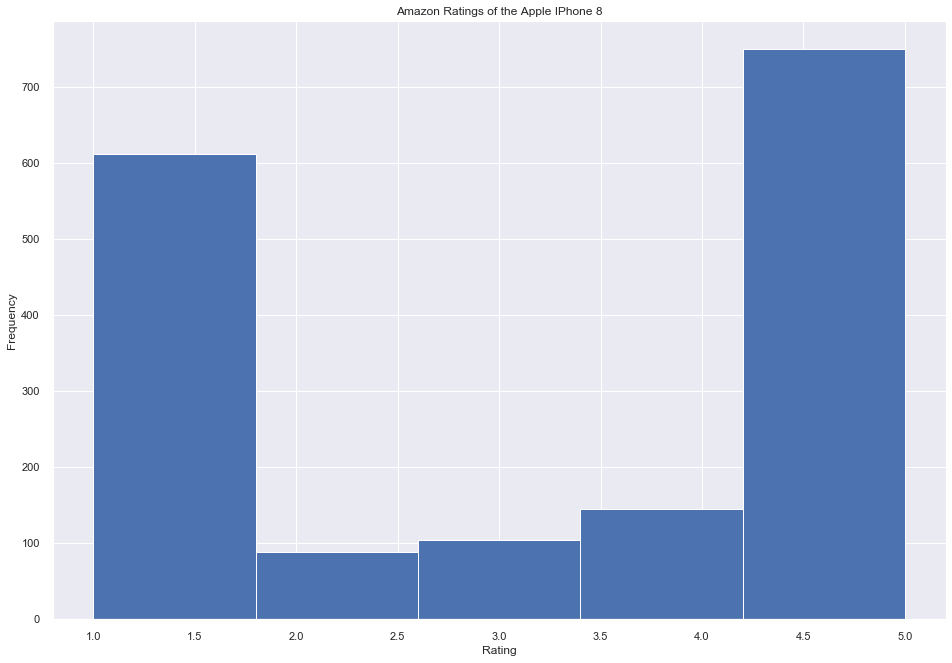

In [569]:
#Learning about the distribution of the reviews
plt.hist(apple['Rating'],bins=5)
plt.title("Amazon Ratings of the Apple IPhone 8")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

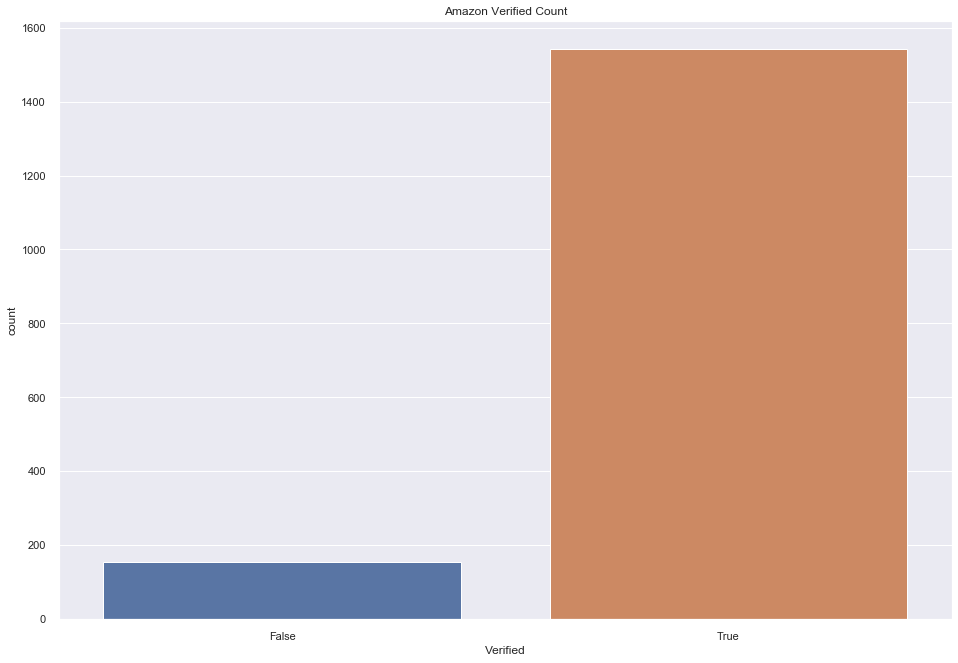

In [570]:
#Seeing how many of these ratings are from a verified source - bar chart.
plt.title('Amazon Verified Count')
sns.countplot(x="Verified", data=apple)

In [571]:
### Sentiment Analysis:
#Lowering the casing.
apple['Review'] = apple['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
apple.sample(n=2)

Item #  Brand                                              Model  \
2083  B0731HBTZ7  Apple           Apple iPhone 7 32GB, Rose Gold (Renewed)   
4341  B07KFNRQ5S  Apple  Apple iPhone Xs Max, 256GB, Space Gray - Fully...   

      Reviews  Price  Rating       Date  Verified   Review Title  \
2083      452  210.0       5 2019-05-23      True  Sin problemas   
4341      230    0.0       1 2019-07-17      True           Fake   

                                                 Review  Helpful  
2083  completamente desbloqueado, lo compré para usa...      3.0  
4341  bought this for a friend and it never worked. ...     11.0

In [572]:
#Removing punctuation.
apple['Review'] = apple['Review'].map(lambda x: re.sub(r'\W+', ' ', x))
apple.sample(n=2)

Item #  Brand                                              Model  \
1317  B06XRJQX91  Apple  Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...   
2924  B0775451TT  Apple  Apple iPhone X, 256GB, Silver - For AT&T / T-M...   

      Reviews   Price  Rating       Date  Verified  \
1317      427  271.84       2 2018-07-08      True   
2924      436  749.99       5 2018-12-13     False   

                        Review Title  \
1317                   Functionality   
2924  Waited four months to review .   

                                                 Review  Helpful  
1317  cosmetically it was a good buy but it would no...      1.0  
2924  i didn t want to rate it till i was sure i m s...      2.0

In [573]:
#Removing stop words.
stop = stopwords.words('english') #stop words = English.
apple['Review'] = apple['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 
apple.sample(n=2)

Item #  Brand                                              Model  \
4253  B07D6TQP6F  Apple  Apple iPhone X, 256GB, Silver - For AT&T (Rene...   
4316  B07HKQ61NV  Apple  Apple iPhone 8 a1905 64GB LTE GSM Unlocked (Re...   

      Reviews   Price  Rating       Date  Verified  \
4253      436    0.00       3 2019-04-17      True   
4316       29  328.97       5 2019-10-27      True   

                                      Review Title  \
4253  Renewed with aftermarket parts. I believe so   
4316                                           gr8   

                                                 Review  Helpful  
4253  package came random box note apple unit believ...      1.0  
4316                                                gr8      1.0

In [574]:
#Word tokenizing
apple['Review'] = apple['Review'].apply(word_tokenize) 
apple.sample(n=2)

Item #  Brand                                              Model  \
4216  B07D6TQP6F  Apple  Apple iPhone X, 256GB, Silver - For AT&T (Rene...   
986   B06XRG6S73  Apple  Apple iPhone 6S, 16GB, Rose Gold - For AT&T / ...   

      Reviews  Price  Rating       Date  Verified  \
4216      436    0.0       5 2019-03-23     False   
986       379    0.0       1 2019-03-08      True   

                                           Review Title  \
4216  I would recommend this to friends and family w...   
986       Do not buy. Still waiting for seller response   

                                                 Review  Helpful  
4216  [phone, little, month, works, flawlessly, look...      9.0  
986   [waste, time, phone, shuts, battery, lasts, hour]      2.0

In [575]:
#word stemming
stemmer = PorterStemmer()
apple['Review'] = apple['Review'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x]))
apple.sample(n=2)

Item #  Brand                                              Model  \
354  B01N9YO1DS  Apple  Apple iPhone 7, 128GB, Gold - For AT&T / T-Mob...   
362  B01N9YO1DS  Apple  Apple iPhone 7, 128GB, Gold - For AT&T / T-Mob...   

     Reviews   Price  Rating       Date  Verified  \
354      227  399.99       1 2019-07-22      True   
362      227  399.99       3 2018-03-29      True   

                               Review Title  \
354  Buyers BEWARE when PURCHASING IPHONES7   
362     Item looks exactly like the pocture   

                                                Review  Helpful  
354  buyer bewar purchas iphon 7 phone stop work ha...      1.0  
362  item look exactli like poctur howev awar descr...     33.0

In [576]:
with open("M4-1.txt", "r"):
    print(open("M4-1.txt", "r").read())

In this section, we loaded the data and examined the data. We found out about the summary statistics, we combined the data together and did the same thing again. We searched for key words, which in our case was the iPhone, and found only the reviews that examined that phone. We then made a dataframe out of that search.

After that, we generated some graphics which gave the overview as to how people felt about the phones. We then showed how many of these reviews were from verified purchasers. This is important because it allows us to gauge how much weight we should put into the results of our analyses.

Finally, we did some preprocessing. We lowercased everything within a review. We removed punctuation, tokenized and stemmed the words.


# Splitting the dataframe to review several aspects.

In [577]:
#List of terms people would use to review.
Battery = ["battery", 'charge', 'juice', 'charging', 'talk time', 'hours', 'minutes', 'life', 'lasts']
Camera = ["camera", 'pixels', 'megapixels', 'pictures', 'video', 'facial', 'recognition', 'animoji', 'zoom', 'dual',
          'optical', 'front', 'rear', 'back', 'lens']
Speed = ['speed', 'fast', 'slow', 'quick', 'lag', 'ram']
Storage = ["storage", 'space', 'room', 'memory', 'gb', 'capacity', 'expandable']
Software = ["software", 'itunes', 'app store', 'app', 'ios', 'animoji', 'game', 'siri', 'touch screen']
Music = ["music", 'audio', 'song', 'sound', 'speaker']
Screen = ["screen", 'oled', 'led', 'lcd', 'scratch', 'widescreen', 'backlit', 'display', 'retina', 'glass', 'inch',
          'resolution', 'break', 'unbreakable', 'shatter', 'chip']
Appearance = ["color", "size", 'colour', 'case', 'looks', 'vibrant']

In [578]:
#Searching all rows for items in the lists.
appe = apple[apple['Review'].str.lower().str.contains('|'.join(Appearance))]
batt = apple[apple['Review'].str.lower().str.contains('|'.join(Battery))]
came = apple[apple['Review'].str.lower().str.contains('|'.join(Camera))]
spee = apple[apple['Review'].str.lower().str.contains('|'.join(Speed))]
stor = apple[apple['Review'].str.lower().str.contains('|'.join(Storage))]
soft = apple[apple['Review'].str.lower().str.contains('|'.join(Software))]
musi = apple[apple['Review'].str.lower().str.contains('|'.join(Music))]
scre = apple[apple['Review'].str.lower().str.contains('|'.join(Screen))]

In [579]:
#Defining the sentiment analysis function
def ss(x):
    return TextBlob(x).sentiment 

In [580]:
with open("M4-2.txt", "r"):
    print(open("M4-2.txt", "r").read())

In this section, we created lists of different keywords to pick up when searching to separate and create new dataframes based on the topic. We also defined our function for sentiment analysis using the TextBlob module. This will determine the positivity and subjectivity level, so we can understand the happiness and opinionated levels of the reviews of the iphones.


# Appearance

In [581]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
appe['Score'] = appe['Review'].apply(ss)
appe['Positivity'] = appe['Score'].apply(lambda x:x[0])
appe['Subjectivity'] = appe['Score'].apply(lambda x:x[1])
appe['Topic'] = 'Appearance'
appe.head()

Item #  Brand                                              Model  \
5   B01CR1FQMG  Apple  Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...   
11  B01CR1FQMG  Apple  Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...   
17  B01GXAT0CE  Apple  Apple iPhone SE, 16GB, Rose Gold - For AT&T / ...   
18  B01GXAT0CE  Apple  Apple iPhone SE, 16GB, Rose Gold - For AT&T / ...   
19  B01GXAT0CE  Apple  Apple iPhone SE, 16GB, Rose Gold - For AT&T / ...   

    Reviews   Price  Rating       Date  Verified  \
5         1  659.99       5 2017-04-03      True   
11        1  659.99       5 2019-03-22      True   
17        2    0.00       1 2017-05-01      True   
18        2    0.00       5 2018-12-04      True   
19        2    0.00       5 2018-08-14      True   

                                         Review Title  \
5                                    All good so far.   
11                                    Super Satisfied   
17                   It seems like it has been stolen   
18                          Much Better Than Expected   
19  Excellent refurbished (or new??) iPhone se fro...   

                                               Review  Helpful  \
5   tldr great phone look new pay attent seller ma...      1.0   
11  go blunt review 1 phone came three day awesom ...     40.0   
17  product came beaten box came lock still otter ...    990.0   
18  want second phone backup iphon se decid buy an...     93.0   
19  first import consid refurbish item vendor phon...     76.0   

                                        Score  Positivity  Subjectivity  \
5   (0.33379953379953375, 0.6558275058275058)    0.333800      0.655828   
11  (0.16391547049441785, 0.4358585858585859)    0.163915      0.435859   
17                 (0.375, 0.611111111111111)    0.375000      0.611111   
18  (0.18020464384100746, 0.5092680047225502)    0.180205      0.509268   
19   (0.2568764568764569, 0.5331779331779332)    0.256876      0.533178   

         Topic  
5   Appearance  
11  Appearance  
17  Appearance  
18  Appearance  
19  Appearance

In [582]:
appe.describe()

Reviews       Price     Rating    Helpful  Positivity  Subjectivity
count   99.000000   99.000000  99.000000   99.00000   99.000000     99.000000
mean   238.050505  179.699899   3.797980   46.40404    0.202641      0.465874
std    151.490781  224.810270   1.538485  148.88572    0.202527      0.179928
min      1.000000    0.000000   1.000000    1.00000   -0.250000      0.000000
25%    146.000000    0.000000   3.000000    1.00000    0.077045      0.401061
50%    198.000000    0.000000   5.000000    3.00000    0.196429      0.484091
75%    394.000000  295.915000   5.000000   10.00000    0.329735      0.581383
max    452.000000  749.990000   5.000000  990.00000    0.800000      0.800000

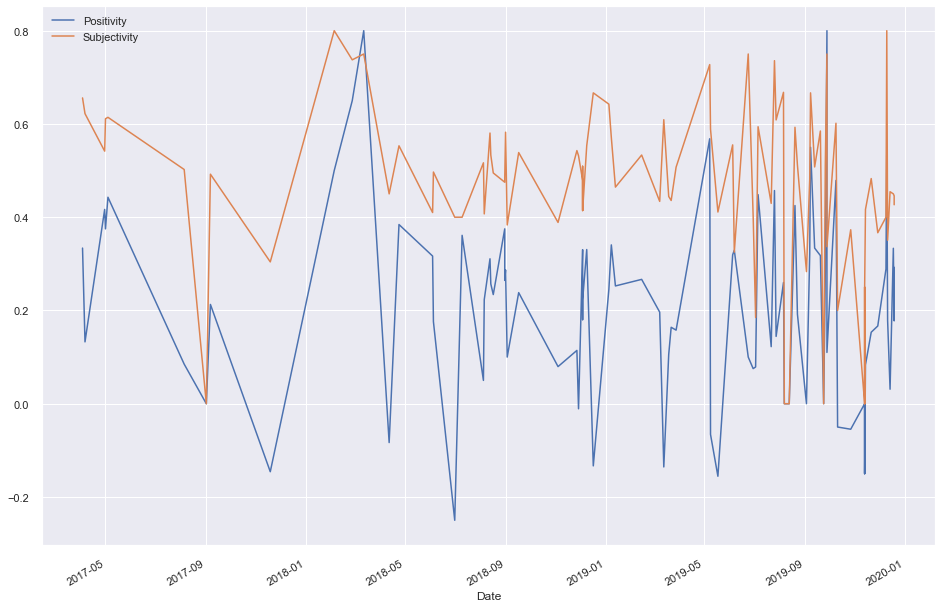

In [583]:
#Time series
ylist = ['Positivity', 'Subjectivity']
appe_ts = appe.plot(x='Date', y=ylist)

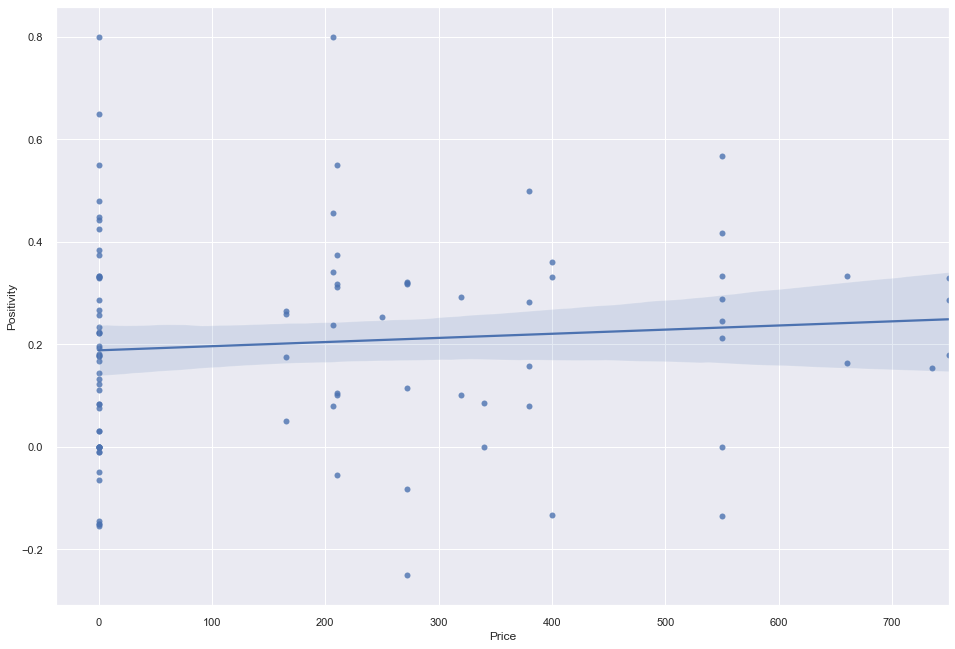

In [584]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=appe)

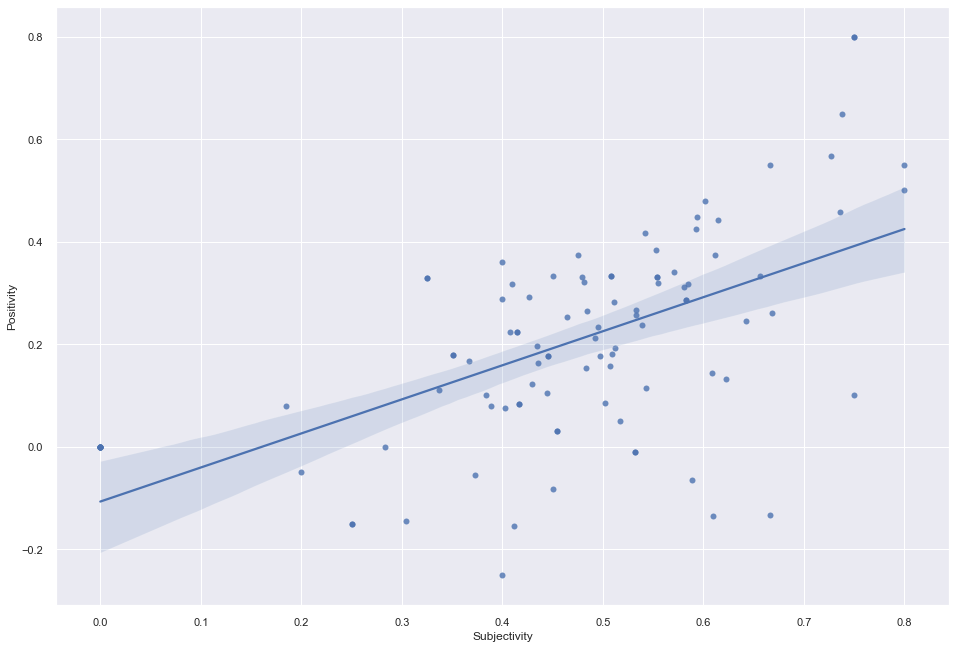

In [585]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=appe)

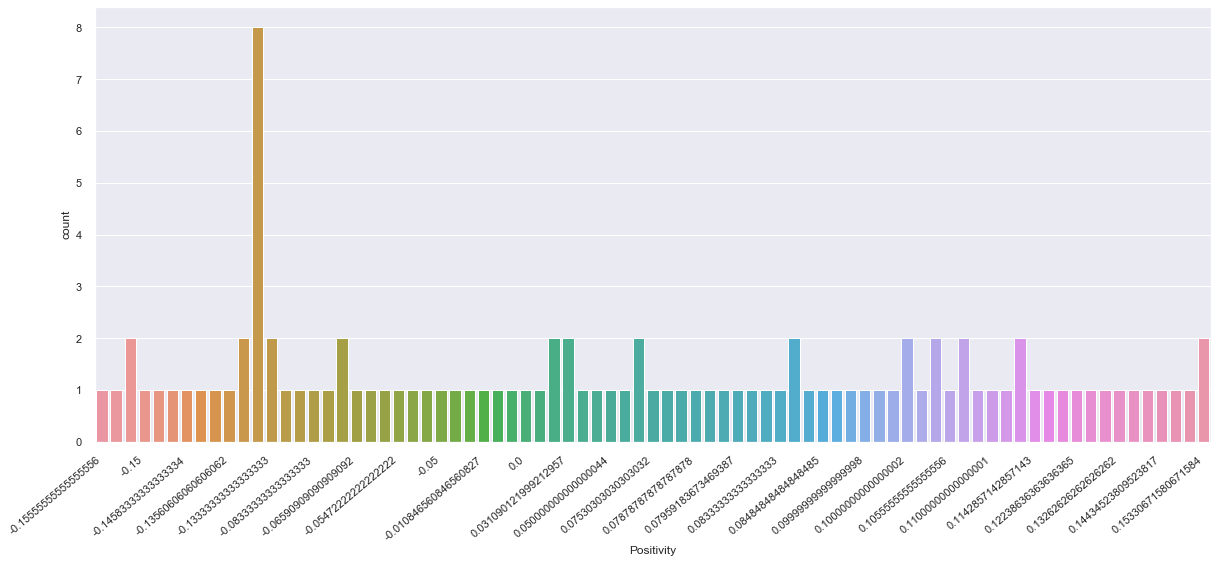

In [586]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(appe['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

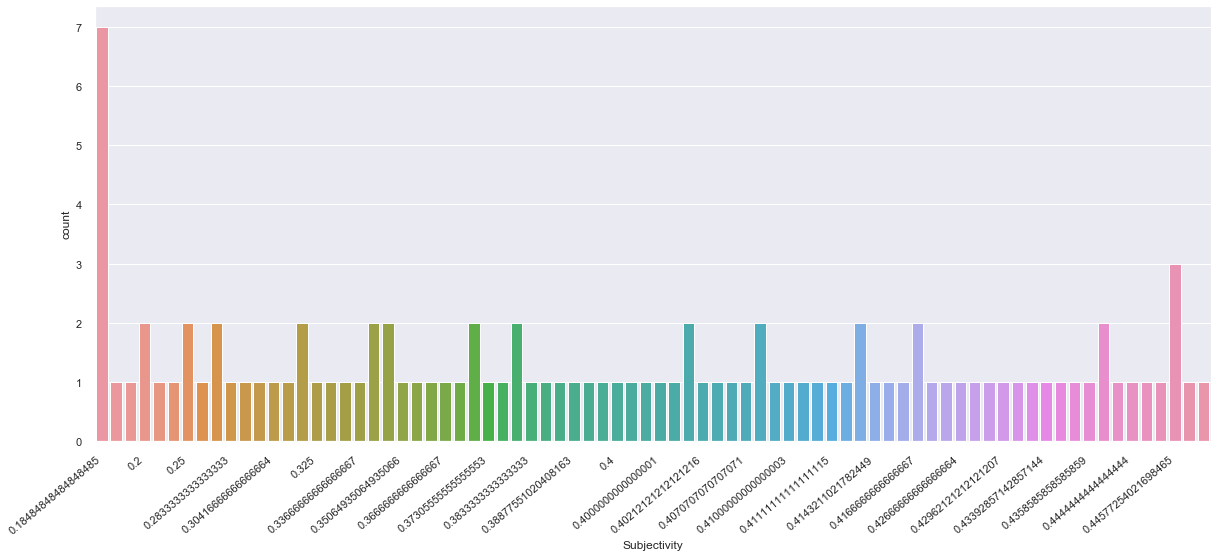

In [587]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(appe['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 6.59990000e+02,  5.00000000e+00,  3.33799534e-01,
         6.55827506e-01],
       [ 6.59990000e+02,  5.00000000e+00,  1.63915470e-01,
         4.35858586e-01],
       [ 0.00000000e+00,  1.00000000e+00,  3.75000000e-01,
         6.11111111e-01],
       [ 0.00000000e+00,  5.00000000e+00,  1.80204644e-01,
         5.09268005e-01],
       [ 0.00000000e+00,  5.00000000e+00,  2.56876457e-01,
         5.33177933e-01],
       [ 3.39990000e+02,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.39990000e+02,  1.00000000e+00,  8.48484848e-02,
         5.02272727e-01],
       [ 0.00000000e+00,  5.00000000e+00, -1.08465608e-02,
         5.31746032e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.99990000e+02,  5.00000000e+00, -1.33333333e-01,
         6.66666667e-01],
       [ 3.99990000e+02,  3.00000000e+00,  3.61111111e-01,
         4.00000000e-01],
       [ 3.99990000e+02,  4.00000000e+00,  3.30303030e-01,
      

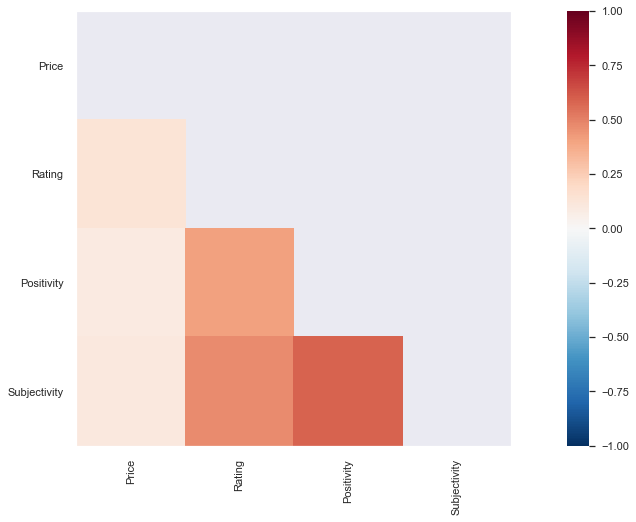

In [588]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = appe[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [589]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(appe['Rating'],appe['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(appe['Subjectivity'],appe['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(appe['Rating'],appe['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.41
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: 0.591
Subjectivity/Positivity Probability is: 0.0
Subjectivity/Rating R is: 0.471
Subjectivity/Rating Probability is: 0.0


In [590]:
with open("M4-3.txt", "r"):
    print(open("M4-3.txt", "r").read())

The appearance of the phone was found to have a slightly decreasing subjectivity score with a slightly increasing positivity score over the time series analysis, although there was great variance. Still, even at its worst, the reviews regarding appearance was only slightly negative.

As price increased, positivity barely had any increase, which made sense as the appearance of the phone looked the same as long as there were no defects.

As subjectivity increased, so did positivity. This indicated that the more opinionated people were about the appearance, the more positive those opinions were.

The histogram about appearance was very much uniform, with a peak at 0, as many reviews were either in other languages or had nothing that sentiment analysis could pick up on. the same was true in regards to subjectivity scores.

Correlation testing found some moderately strong links, most strongly between positivity and subjectivity, with an r-squared of .591. The links between rating and positi

# Battery

In [591]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
batt['Score'] = batt['Review'].apply(ss)
batt['Positivity'] = batt['Score'].apply(lambda x:x[0])
batt['Subjectivity'] = batt['Score'].apply(lambda x:x[1])
batt['Topic'] = 'Battery'
batt.sample(n=2)

Item #  Brand                                              Model  \
3942  B07D6TQP6F  Apple  Apple iPhone X, 256GB, Silver - For AT&T (Rene...   
4638  B07Q6VQ147  Apple  Apple iPhone 7, 128GB, Rose Gold - Fully Unloc...   

      Reviews  Price  Rating       Date  Verified           Review Title  \
3942      436    0.0       5 2018-12-12      True  Exceeded Expectations   
4638        4    0.0       1 2018-04-07      True              Returning   

                                                 Review  Helpful  \
3942  love new phone look work everyth work batteri ...     64.0   
4638  return one unlock phone month screen start go ...    193.0   

                                           Score  Positivity  Subjectivity  \
3942   (0.47272727272727266, 0.5590909090909091)    0.472727      0.559091   
4638  (-0.20833333333333331, 0.3416666666666667)   -0.208333      0.341667   

        Topic  
3942  Battery  
4638  Battery

In [592]:
batt.describe()

Reviews       Price      Rating     Helpful  Positivity  \
count  276.000000  276.000000  276.000000  276.000000  276.000000   
mean   284.094203  184.117862    3.652174   29.735507    0.219410   
std    156.178587  266.551348    1.584710   76.252063    0.276299   
min      1.000000    0.000000    1.000000    1.000000   -1.000000   
25%    176.000000    0.000000    2.000000    1.000000    0.067803   
50%    311.000000    0.000000    4.000000    3.000000    0.200909   
75%    436.000000  271.840000    5.000000   10.250000    0.417045   
max    452.000000  749.990000    5.000000  483.000000    1.000000   

       Subjectivity  
count    276.000000  
mean       0.497533  
std        0.201619  
min        0.000000  
25%        0.387682  
50%        0.500000  
75%        0.602948  
max        1.000000

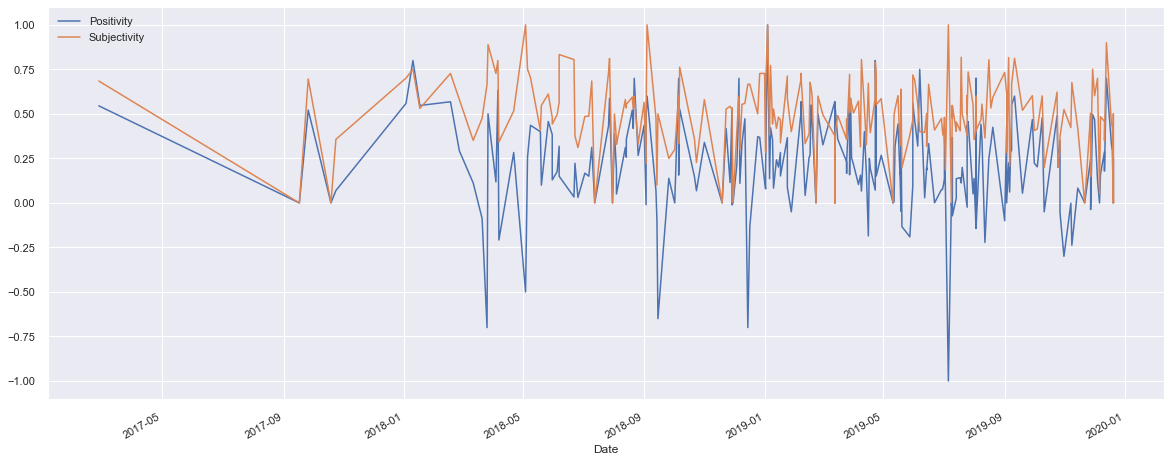

In [593]:
#Time series
batt_ts = batt.plot(x='Date', y=ylist)

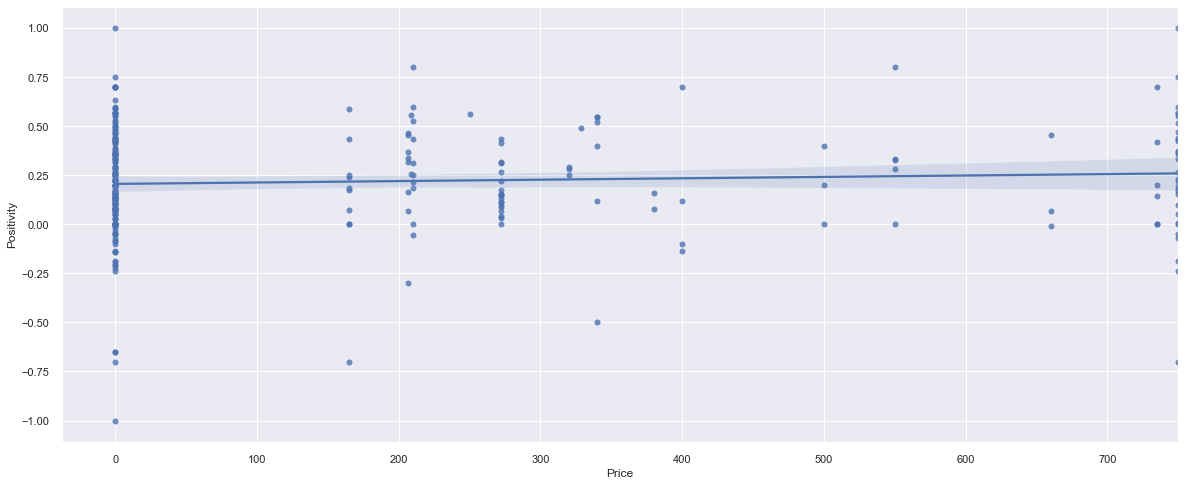

In [594]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=batt)

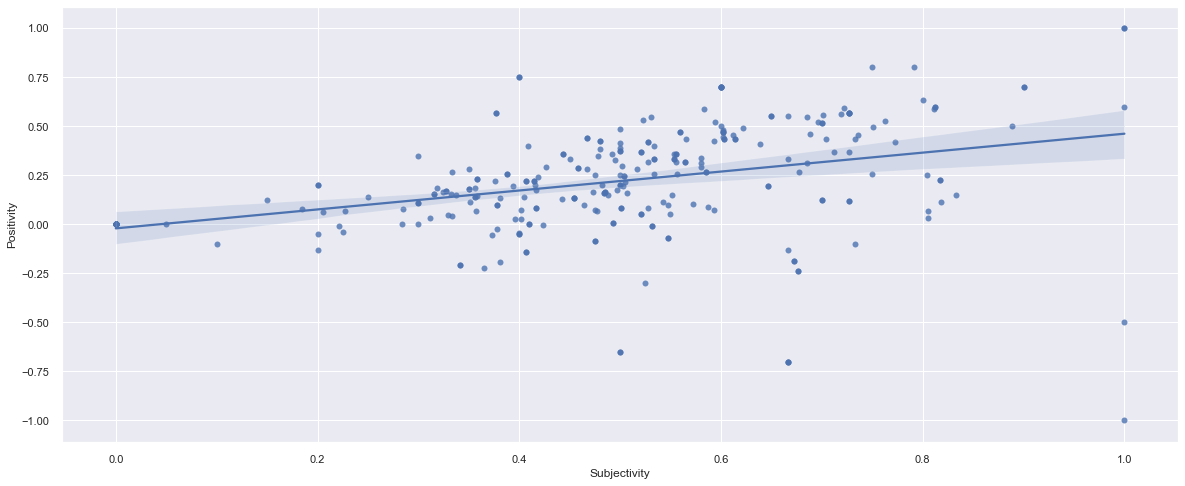

In [595]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=batt)

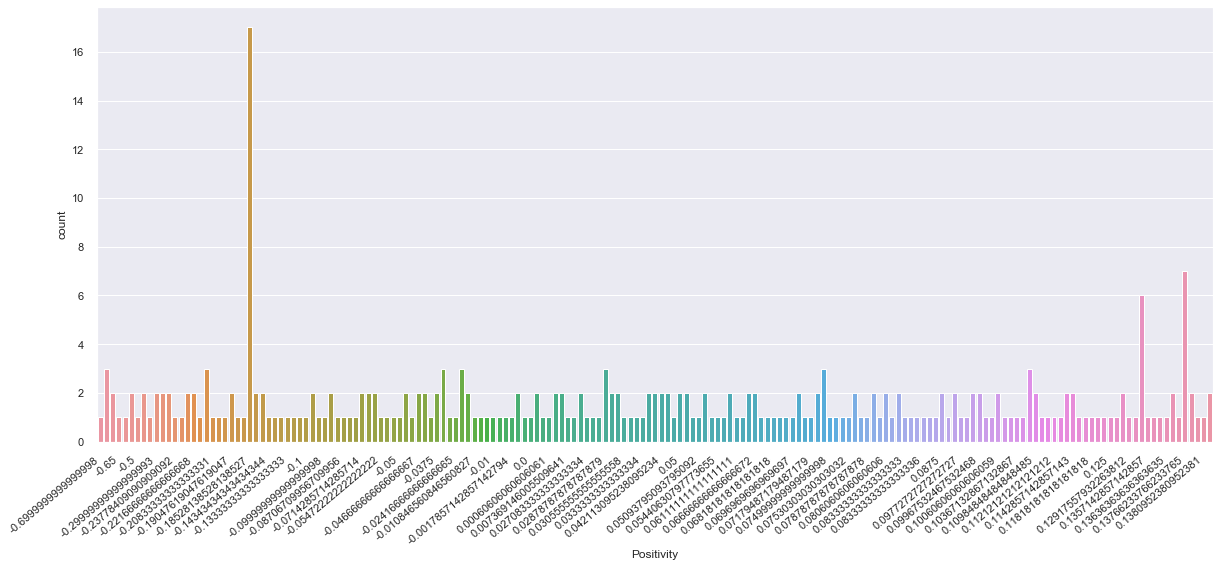

In [596]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(batt['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

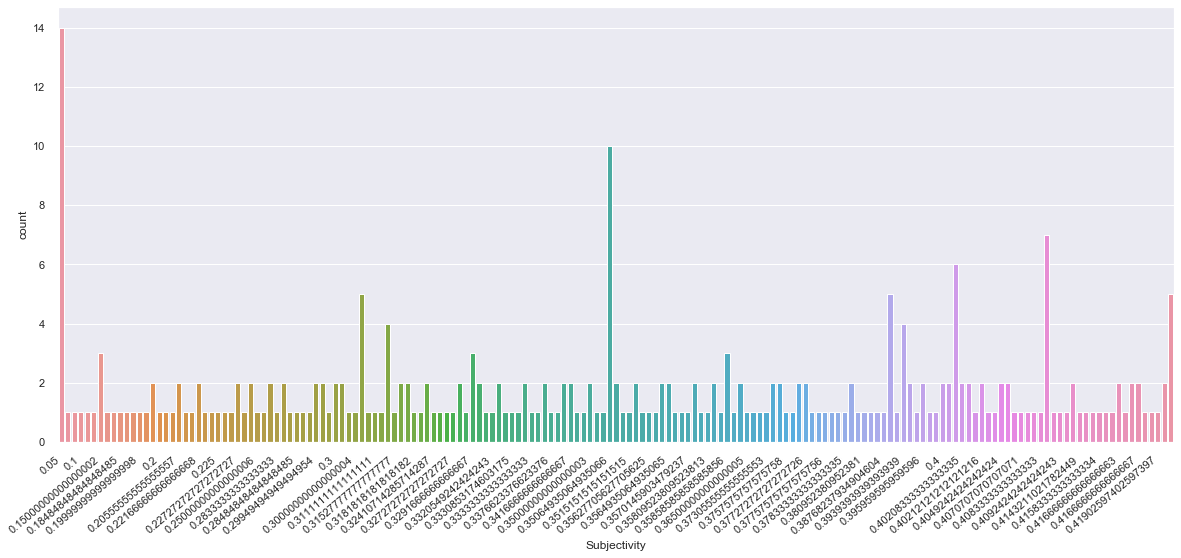

In [597]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(batt['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 6.59990000e+02,  1.00000000e+00,  6.96969697e-02,
         3.57014590e-01],
       [ 6.59990000e+02,  5.00000000e+00,  4.57235622e-01,
         6.11533704e-01],
       [ 6.59990000e+02,  1.00000000e+00, -1.00000000e-02,
         2.21666667e-01],
       ...,
       [ 0.00000000e+00,  4.00000000e+00,  7.00000000e-01,
         9.00000000e-01],
       [ 0.00000000e+00,  4.00000000e+00,  2.00000000e-01,
         5.00000000e-01],
       [ 0.00000000e+00,  1.00000000e+00,  8.06060606e-02,
         5.00909091e-01]])

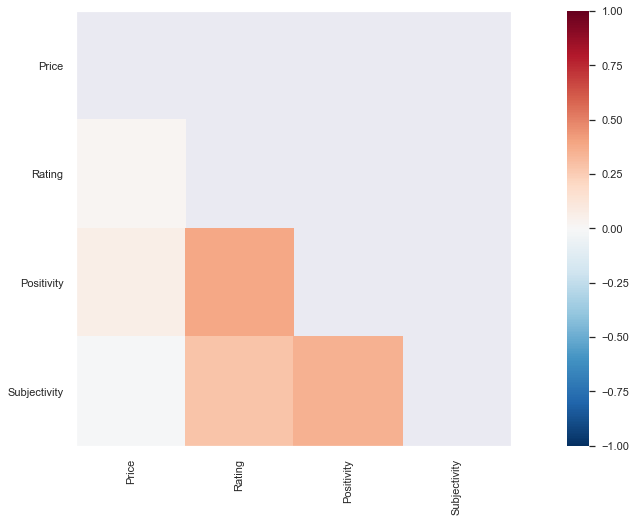

In [598]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = batt[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [599]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(batt['Rating'],batt['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(batt['Subjectivity'],batt['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(batt['Rating'],batt['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.388
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: 0.352
Subjectivity/Positivity Probability is: 0.0
Subjectivity/Rating R is: 0.284
Subjectivity/Rating Probability is: 0.0


# Camera

In [600]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
came['Score'] = came['Review'].apply(ss)
came['Positivity'] = came['Score'].apply(lambda x:x[0])
came['Subjectivity'] = came['Score'].apply(lambda x:x[1])
came['Topic'] = 'Camera'
came.sample(n=2)

Item #  Brand                                              Model  \
3728  B078WZ86Y9  Apple  Apple iPhone 7, 128GB, Red - For AT&T / T-Mobi...   
2638  B0775451TT  Apple  Apple iPhone X, 256GB, Silver - For AT&T / T-M...   

      Reviews   Price  Rating       Date  Verified  \
3728       58    0.00       2 2019-06-16     False   
2638      436  749.99       1 2019-04-20      True   

                          Review Title  \
3728                     What a Waste!   
2638  Possibility to change the phone?   

                                                 Review  Helpful  \
3728  bought phone daughter christma super hype work...      1.0   
2638  bought phone first pictur back camera also im ...    101.0   

                                         Score  Positivity  Subjectivity  \
3728  (0.3333333333333333, 0.6666666666666666)    0.333333      0.666667   
2638              (0.125, 0.16666666666666666)    0.125000      0.166667   

       Topic  
3728  Camera  
2638  Camera

In [601]:
came.describe()

Reviews       Price      Rating     Helpful  Positivity  \
count  271.000000  271.000000  271.000000  271.000000  271.000000   
mean   254.826568  191.749594    2.907749   22.870849    0.144608   
std    157.975231  261.487923    1.749808   55.923376    0.177178   
min      1.000000    0.000000    1.000000    1.000000   -0.400000   
25%    139.000000    0.000000    1.000000    1.000000    0.003939   
50%    230.000000    0.000000    3.000000    3.000000    0.131250   
75%    436.000000  339.990000    5.000000   11.500000    0.270170   
max    452.000000  749.990000    5.000000  416.000000    0.700000   

       Subjectivity  
count    271.000000  
mean       0.393635  
std        0.194122  
min        0.000000  
25%        0.310909  
50%        0.405303  
75%        0.509842  
max        1.000000

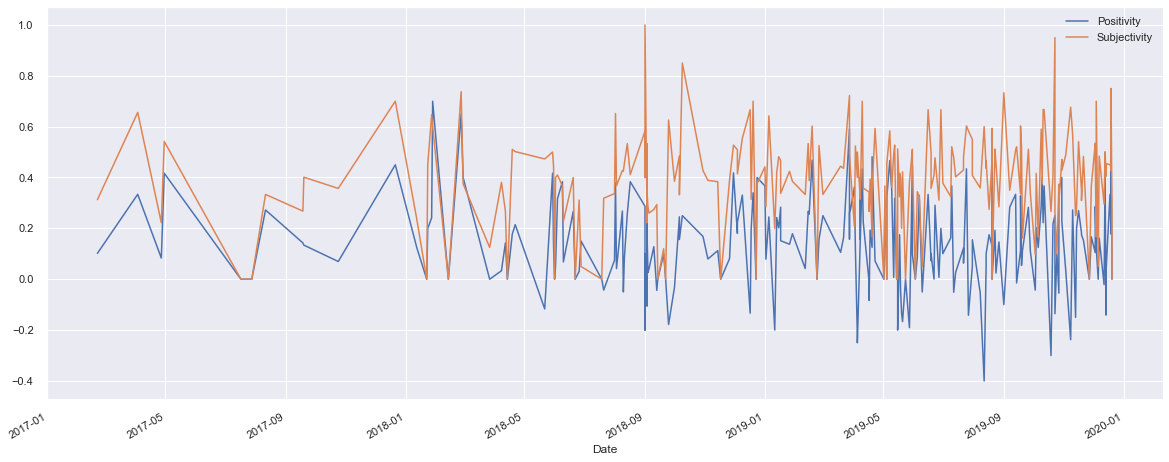

In [602]:
#Time series
came_ts = came.plot(x='Date', y=ylist)

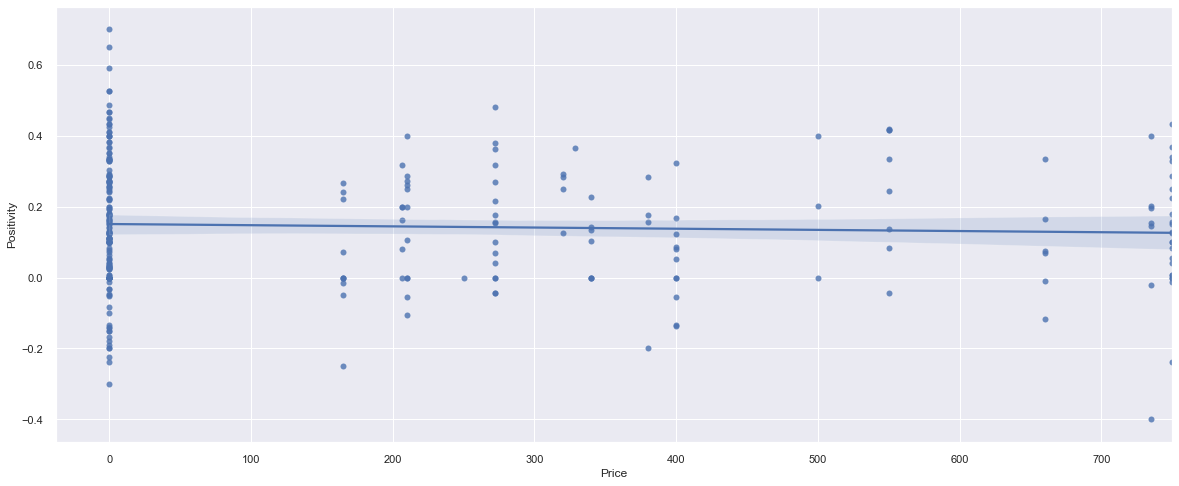

In [603]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=came)

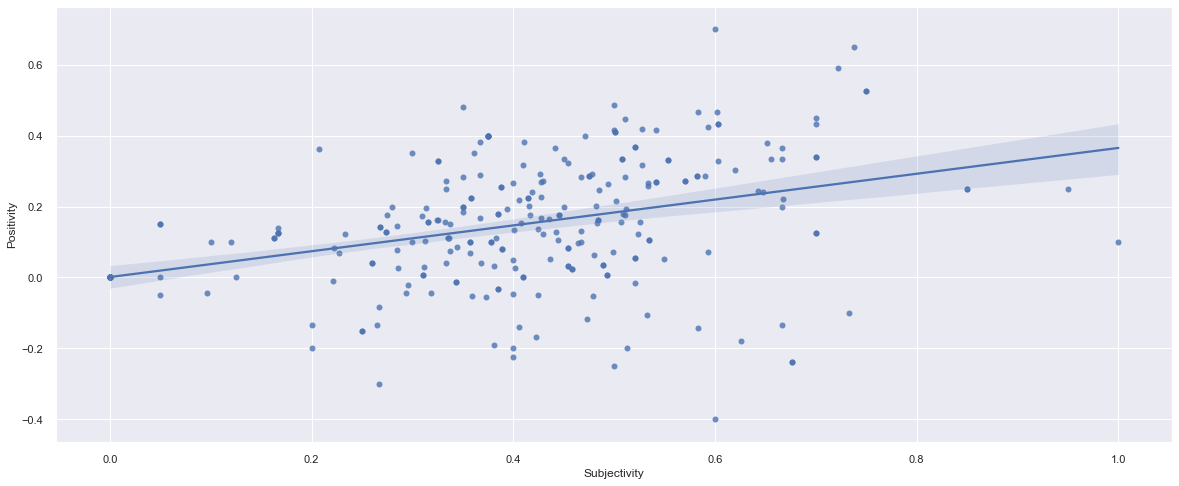

In [604]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=came)

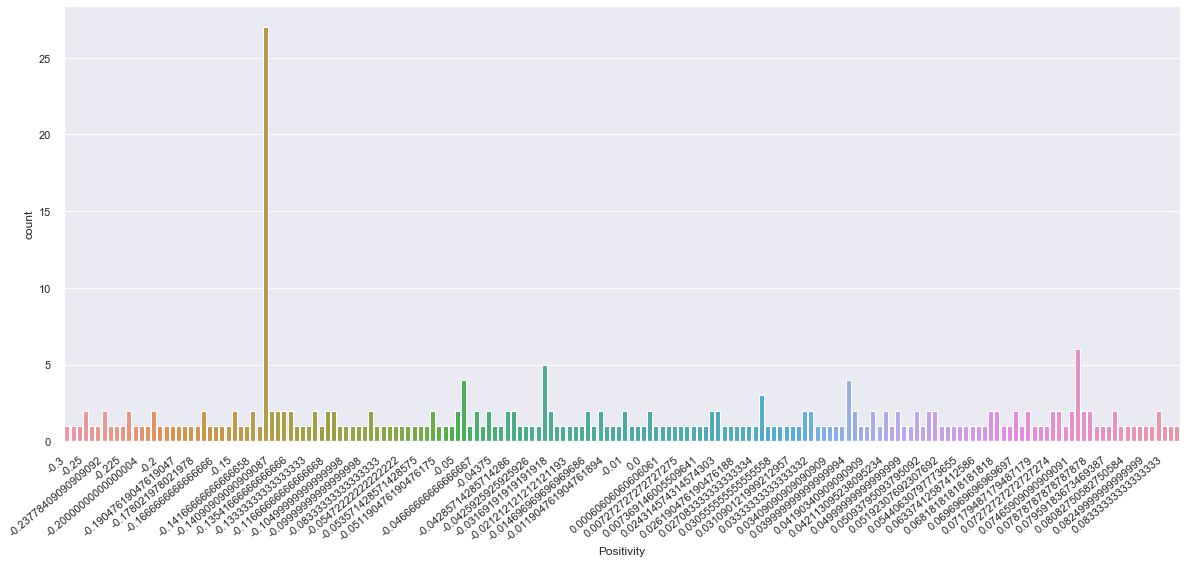

In [605]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(came['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

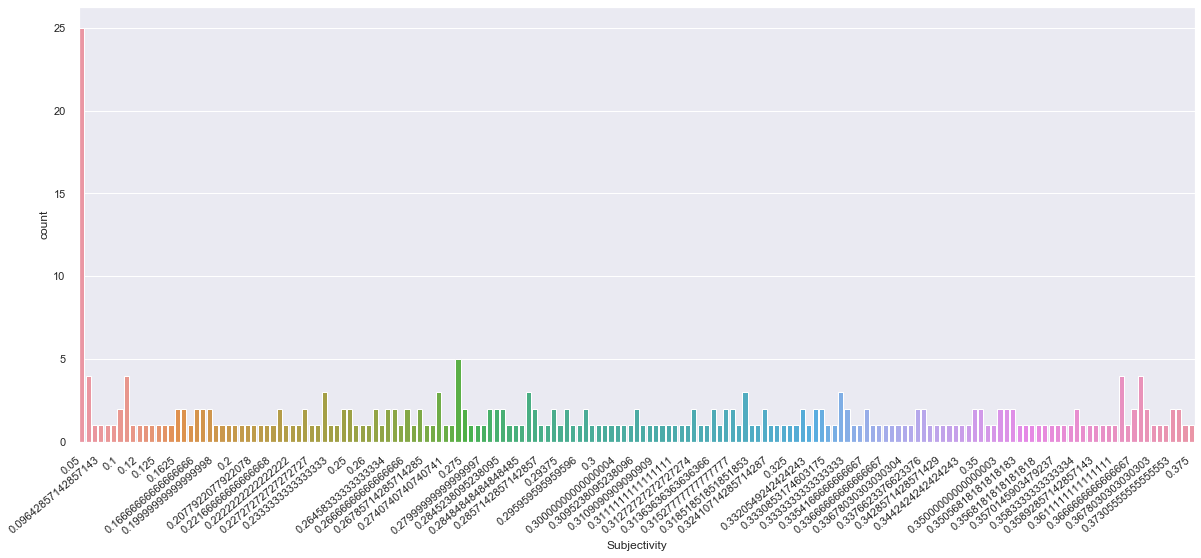

In [606]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(came['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 6.59990000e+02,  5.00000000e+00,  3.33799534e-01,
         6.55827506e-01],
       [ 6.59990000e+02,  1.00000000e+00,  6.96969697e-02,
         3.57014590e-01],
       [ 6.59990000e+02,  1.00000000e+00, -1.00000000e-02,
         2.21666667e-01],
       ...,
       [ 0.00000000e+00,  4.00000000e+00,  3.40909091e-02,
         4.88636364e-01],
       [ 0.00000000e+00,  2.00000000e+00,  3.10901220e-02,
         4.54652860e-01],
       [ 0.00000000e+00,  1.00000000e+00, -1.50000000e-01,
         2.50000000e-01]])

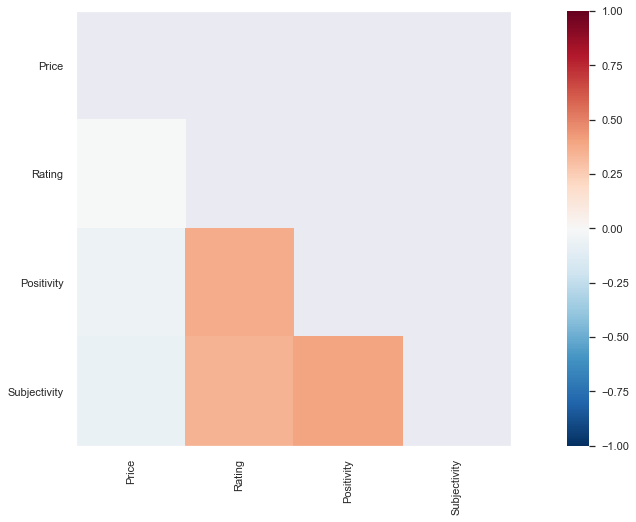

In [607]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = came[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [608]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(came['Rating'],came['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(came['Subjectivity'],came['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(came['Rating'],came['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.37
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: 0.399
Subjectivity/Positivity Probability is: 0.0
Subjectivity/Rating R is: 0.35
Subjectivity/Rating Probability is: 0.0


In [609]:
with open("M4-4.txt", "r"):
    print(open("M4-4.txt", "r").read())

The camera of the iphone was found to have a roughly neutral subjectivity score with a slightly increasing positivity score over the time series analysis, although there was great variance. Most of the reviews were neutral at worst with some outliers hitting -.4, which I would consider moderately negative.

As price increased, positivity had a slight decrease, although it was effectively neutral.

As subjectivity increased, so did positivity. This indicated that the more opinionated people were about the appearance, the more positive those opinions were.

The histogram about appearance was very much uniform, with a peak at 0, as many reviews were either in other languages or had nothing that sentiment analysis could pick up on. the same was true in regards to subjectivity scores.

Correlation testing found some slight to moderate links, most strongly between positivity and subjectivity, with an r-squared of .399. The links between rating and positivity scored .37 and subjectivity and r

# Speed

In [610]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
spee['Score'] = spee['Review'].apply(ss)
spee['Positivity'] = spee['Score'].apply(lambda x:x[0])
spee['Subjectivity'] = spee['Score'].apply(lambda x:x[1])
spee['Topic'] = 'Speed'
spee.sample(n=2)

Item #  Brand                                              Model  \
3132  B07756QYST  Apple  Apple iPhone 8, 64GB, Silver - Fully Unlocked ...   
2658  B0775451TT  Apple  Apple iPhone X, 256GB, Silver - For AT&T / T-M...   

      Reviews   Price  Rating       Date  Verified  \
3132        1    0.00       5 2018-07-03      True   
2658      436  749.99       5 2019-01-09      True   

                            Review Title  \
3132  Good quality for being refurbished   
2658                      Flawless phone   

                                                 Review  Helpful  \
3132  despit basic packag quit impress condit phone ...    309.0   
2658  item came exactli describ complaint batteri li...      9.0   

                                          Score  Positivity  Subjectivity  \
3132   (0.16717171717171717, 0.485479797979798)    0.167172       0.48548   
2658  (0.35624999999999996, 0.4437500000000001)    0.356250       0.44375   

      Topic  
3132  Speed  
2658  Speed

In [611]:
spee.describe()

Reviews       Price      Rating     Helpful  Positivity  \
count  138.000000  138.000000  138.000000  138.000000  138.000000   
mean   258.086957  178.236957    3.884058   25.949275    0.223537   
std    165.874655  265.520964    1.509447   54.252764    0.190192   
min      1.000000    0.000000    1.000000    1.000000   -0.300000   
25%    139.000000    0.000000    3.000000    1.000000    0.100606   
50%    230.000000    0.000000    5.000000    3.000000    0.201250   
75%    436.000000  271.840000    5.000000   12.750000    0.333333   
max    452.000000  749.990000    5.000000  309.000000    0.800000   

       Subjectivity  
count    138.000000  
mean       0.514127  
std        0.158145  
min        0.000000  
25%        0.414699  
50%        0.511651  
75%        0.597470  
max        1.000000

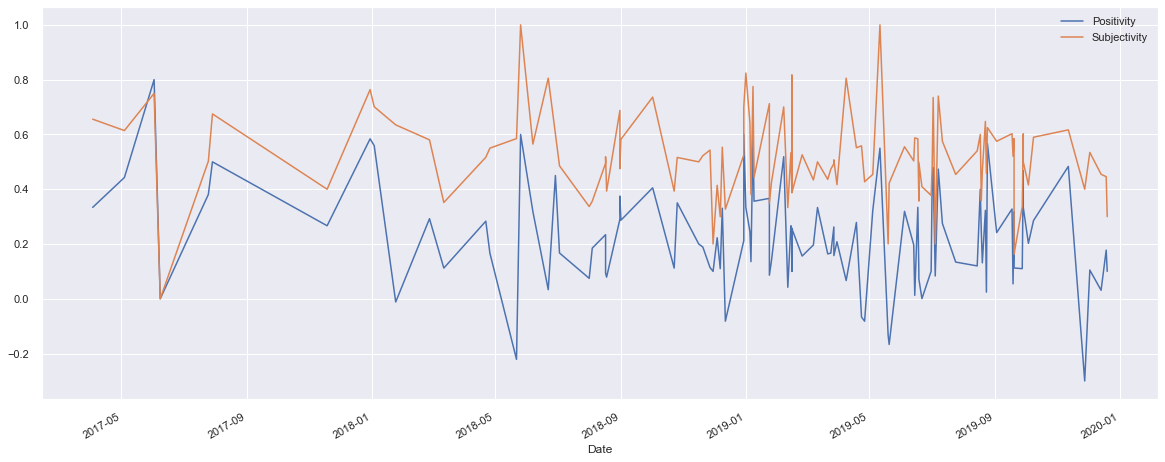

In [612]:
#Time series
spee_ts = spee.plot(x='Date', y=ylist)

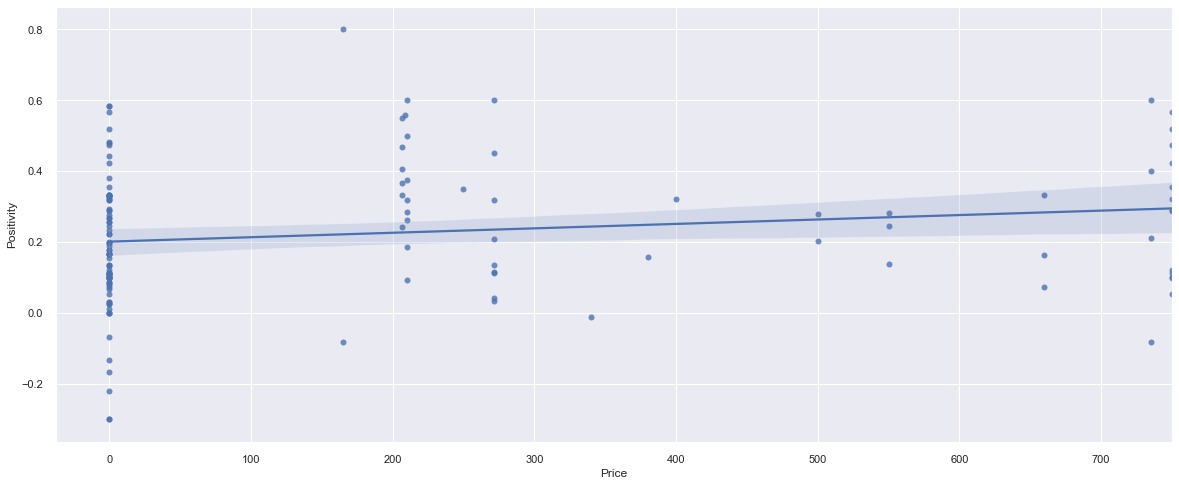

In [613]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=spee)

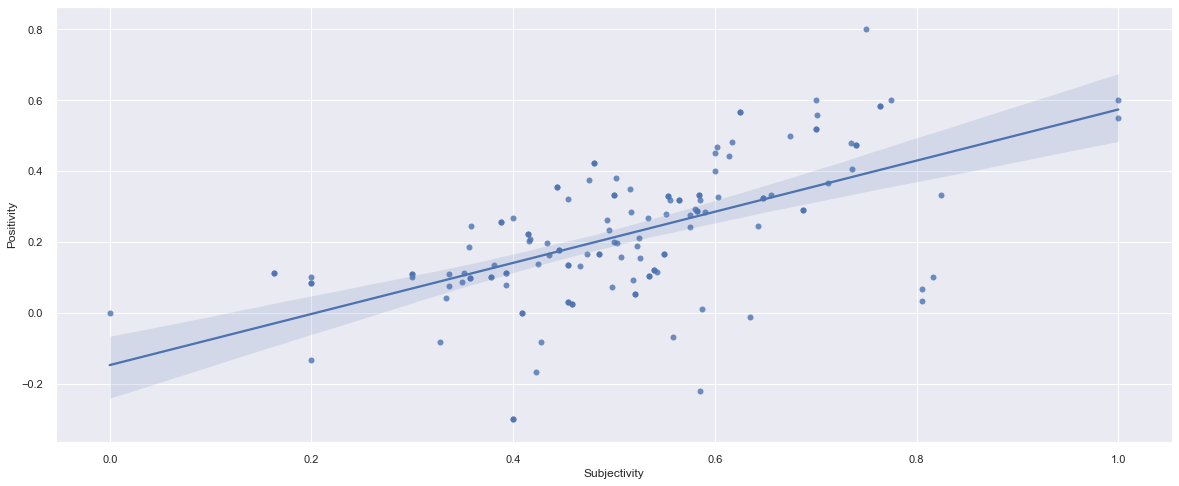

In [614]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=spee)

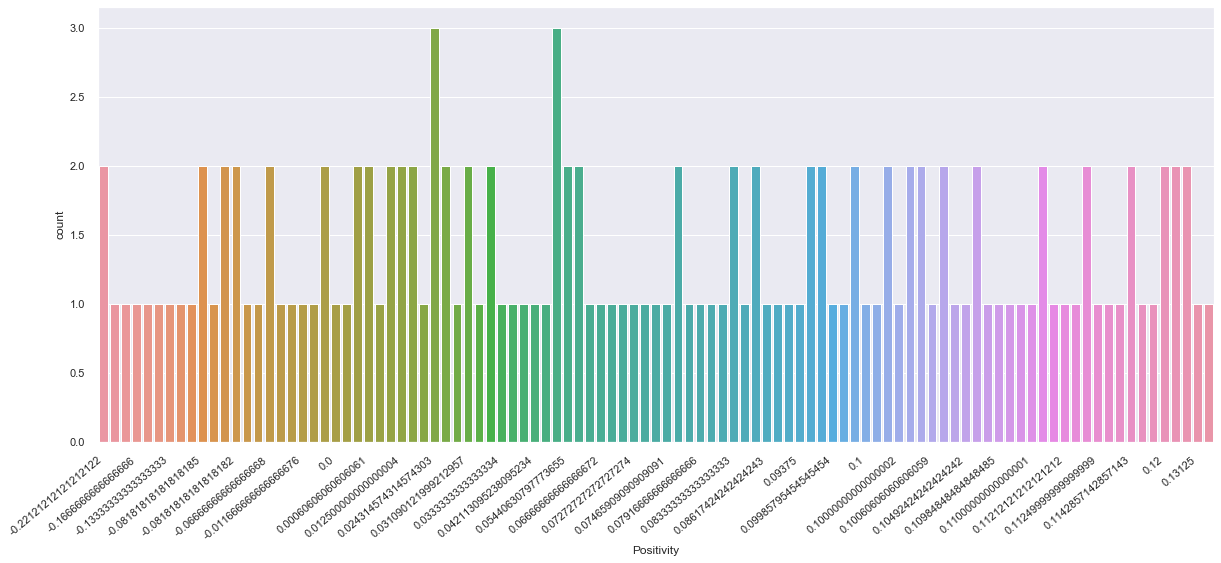

In [615]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(spee['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

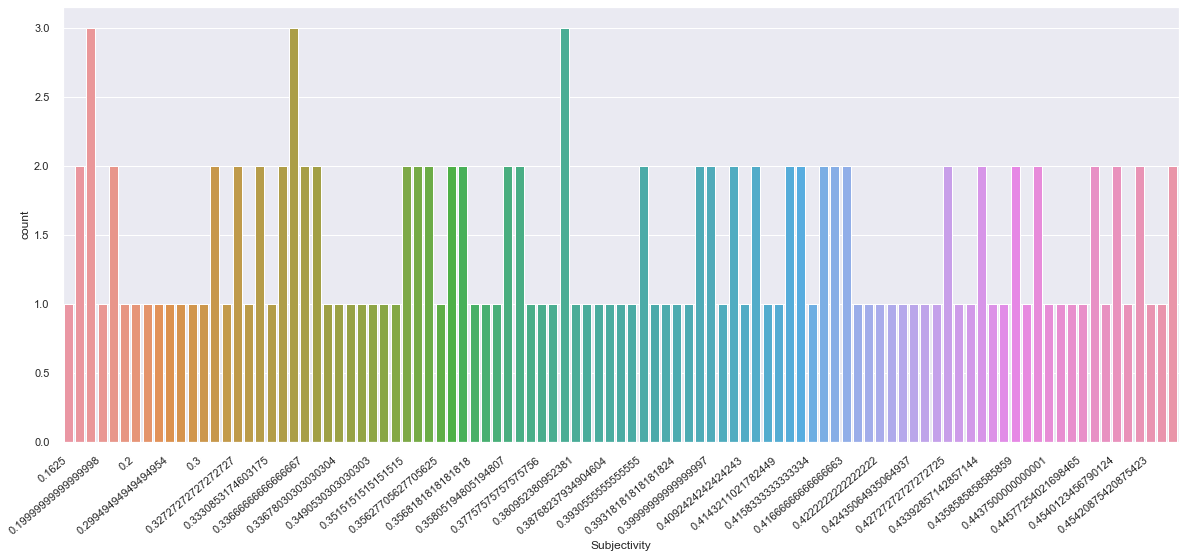

In [616]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(spee['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 0.00000000e+00,  1.00000000e+00,  1.25000000e-02,
         5.87500000e-01],
       [ 6.59990000e+02,  5.00000000e+00,  3.33799534e-01,
         6.55827506e-01],
       [ 6.59990000e+02,  5.00000000e+00,  1.63915470e-01,
         4.35858586e-01],
       [ 6.59990000e+02,  1.00000000e+00,  7.46590909e-02,
         3.36780303e-01],
       [ 0.00000000e+00,  1.00000000e+00,  2.66666667e-01,
         4.00000000e-01],
       [ 0.00000000e+00,  1.00000000e+00,  7.91666667e-02,
         3.93055556e-01],
       [ 3.39990000e+02,  1.00000000e+00, -1.16666667e-02,
         6.35000000e-01],
       [ 0.00000000e+00,  3.00000000e+00,  2.75000000e-01,
         5.75000000e-01],
       [ 0.00000000e+00,  1.00000000e+00,  1.31250000e-01,
         4.66666667e-01],
       [ 0.00000000e+00,  5.00000000e+00,  1.66666667e-01,
         5.50000000e-01],
       [ 3.99990000e+02,  1.00000000e+00,  3.22558923e-01,
         4.54208754e-01],
       [ 0.00000000e+00,  5.00000000e+00,  5.84090909e-01,
      

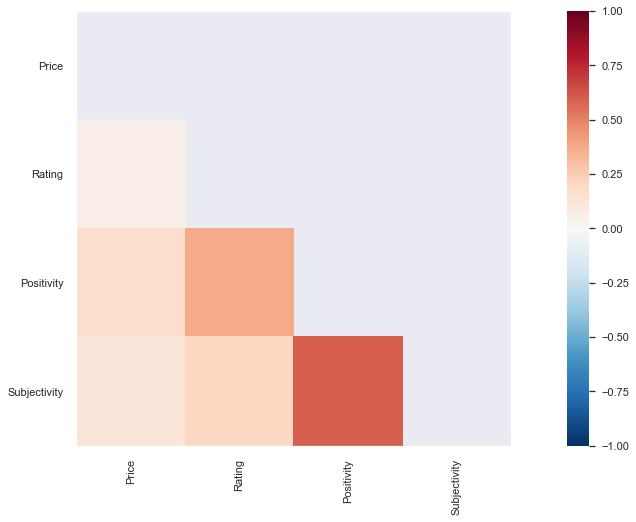

In [617]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = spee[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [618]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(spee['Rating'],spee['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(spee['Subjectivity'],spee['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(spee['Rating'],spee['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.376
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: 0.599
Subjectivity/Positivity Probability is: 0.0
Subjectivity/Rating R is: 0.211
Subjectivity/Rating Probability is: 0.013


In [619]:
with open("M4-5.txt", "r"):
    print(open("M4-5.txt", "r").read())

The speed of the iphone was found to have a lowered subjectivity score with a relatively neutral positivity score over the time series analysis, with little variance. Most of the reviews were neutral at worst with some outliers hitting -.25ish toward the end.

As price increased, positivity had a slight increase.

As subjectivity increased, positivity sharply increased along with it. This indicated that the more opinionated people were about the appearance, the more positive those opinions were.

The histogram about appearance was very much uniform for both positivity and subjectivity. This indicated that people were quite varied with their opinions between the minimum and maximum opinions. There were not many outliers.

Correlation testing found some slight to moderately strong links, most intensely so between positivity and subjectivity, with an r-squared of .599 and an associated p value of less than .001. The links between rating and positivity scored .376, also with an associated 

# Storage

In [620]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
stor['Score'] = stor['Review'].apply(ss)
stor['Positivity'] = stor['Score'].apply(lambda x:x[0])
stor['Subjectivity'] = stor['Score'].apply(lambda x:x[1])
stor['Topic'] = 'Storage'
stor.sample(n=2)

Item #  Brand                                              Model  \
4348  B07KFNRQ5S  Apple  Apple iPhone Xs Max, 256GB, Space Gray - Fully...   
4509  B07KKL5KGG  Apple  Apple iPhone XS, 256GB, Gold - Fully Unlocked ...   

      Reviews  Price  Rating       Date  Verified  \
4348      230    0.0       5 2019-12-19      True   
4509      198    0.0       2 2019-11-14      True   

                                           Review Title  \
4348          Beautiful phone with amazing performance.   
4509  Please be careful... speaker distorts over 50%...   

                                                 Review  Helpful  \
4348  first would like provid experi purchas use pho...      1.0   
4509  skeptic order phone read comment gave shot ord...      2.0   

                                           Score  Positivity  Subjectivity  \
4348  (0.17765151515151517, 0.44577254021698465)    0.177652      0.445773   
4509   (0.08333333333333333, 0.4166666666666667)    0.083333      0.416667   

        Topic  
4348  Storage  
4509  Storage

In [621]:
stor.describe()

Reviews      Price    Rating     Helpful  Positivity  Subjectivity
count   71.000000   71.00000  71.00000   71.000000   71.000000     71.000000
mean   234.521127  178.32662   3.71831   29.126761    0.187462      0.437564
std    162.190880  263.02588   1.62290   67.157369    0.222844      0.225888
min      1.000000    0.00000   1.00000    1.000000   -0.500000      0.000000
25%     96.000000    0.00000   2.00000    1.000000    0.036602      0.387682
50%    230.000000    0.00000   5.00000    2.000000    0.177652      0.454653
75%    427.000000  271.84000   5.00000   14.500000    0.289078      0.537186
max    452.000000  749.99000   5.00000  354.000000    0.700000      1.000000

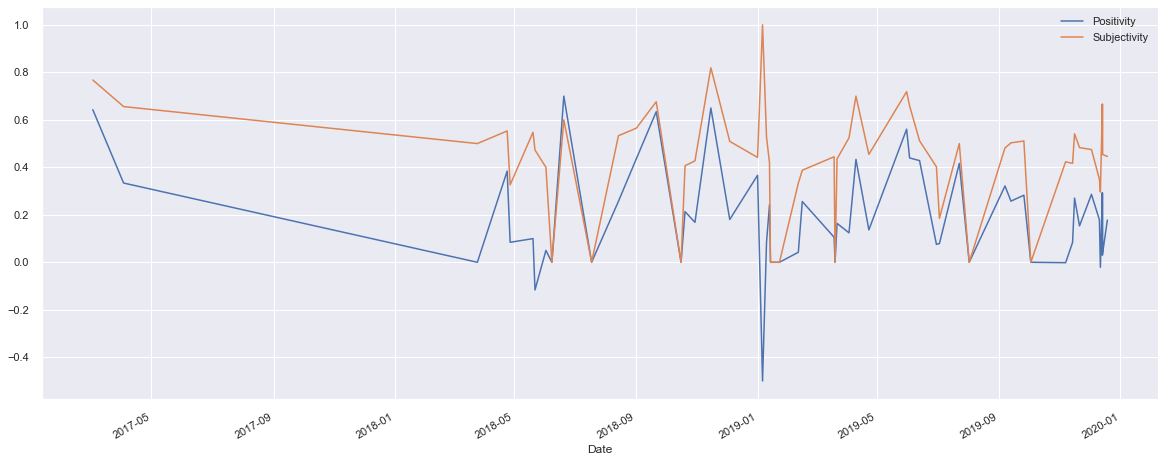

In [622]:
#Time series
stor_ts = stor.plot(x='Date', y=ylist)

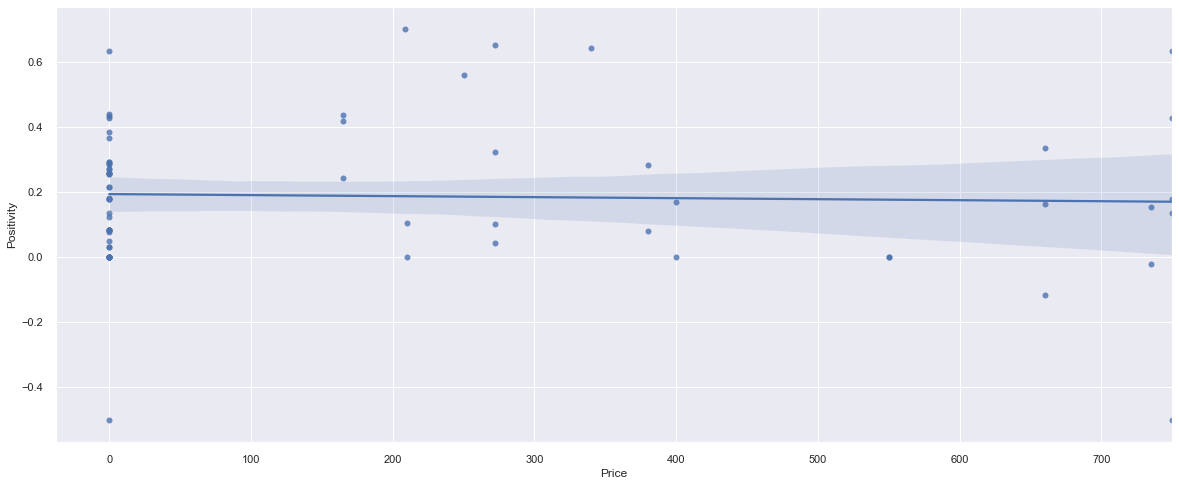

In [623]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=stor)

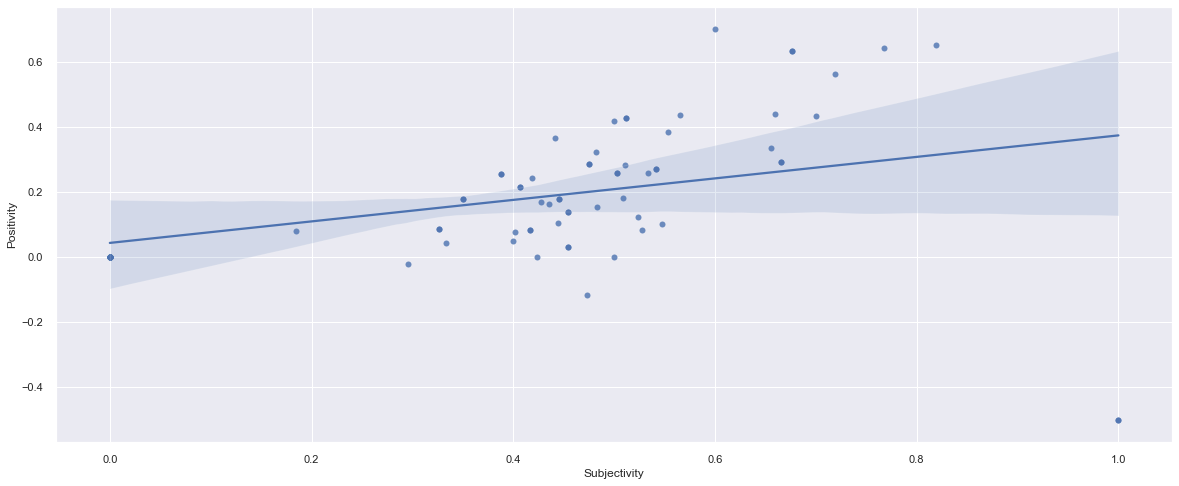

In [624]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=stor)

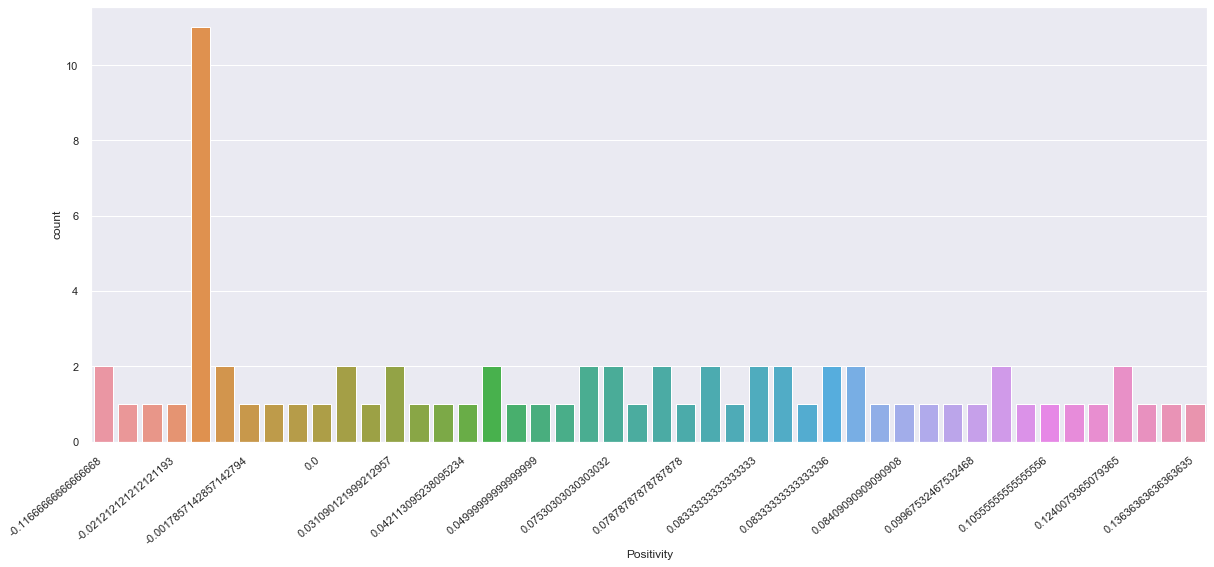

In [625]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(stor['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

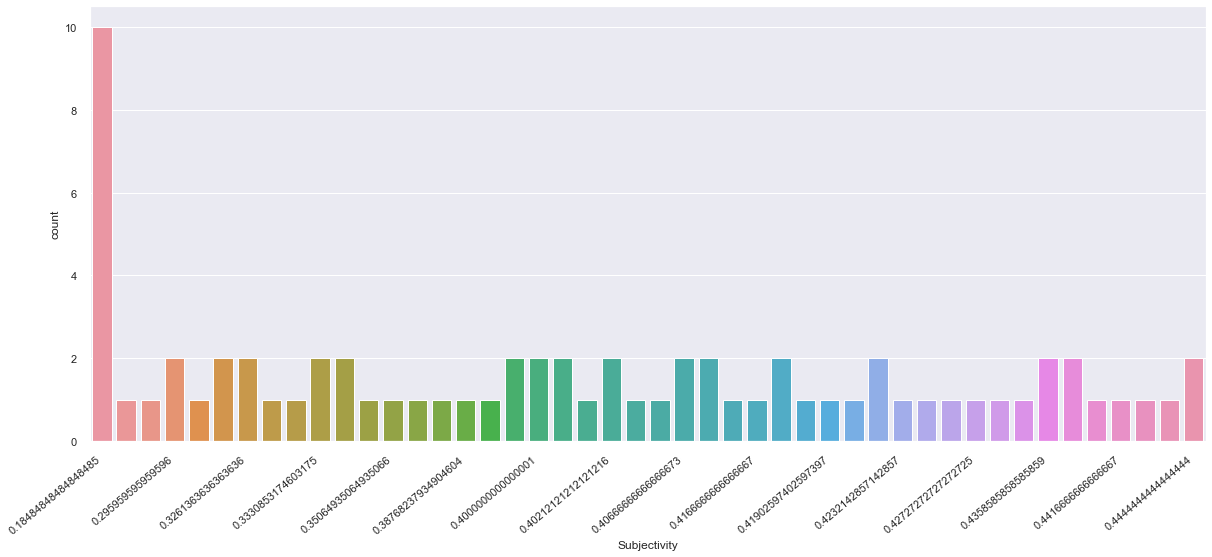

In [626]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(stor['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 6.59990000e+02,  5.00000000e+00,  3.33799534e-01,
         6.55827506e-01],
       [ 6.59990000e+02,  5.00000000e+00,  1.63915470e-01,
         4.35858586e-01],
       [ 6.59990000e+02,  3.00000000e+00, -1.16666667e-01,
         4.72916667e-01],
       [ 0.00000000e+00,  5.00000000e+00,  1.80204644e-01,
         5.09268005e-01],
       [ 0.00000000e+00,  5.00000000e+00,  2.56876457e-01,
         5.33177933e-01],
       [ 3.39990000e+02,  5.00000000e+00,  6.42857143e-01,
         7.67857143e-01],
       [ 0.00000000e+00,  3.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  8.40909091e-02,
         3.26136364e-01],
       [ 3.99990000e+02,  5.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.99990000e+02,  5.00000000e+00,  1.68181818e-01,
         4.27272727e-01],
       [ 0.00000000e+00,  4.00000000e+00,  2.13333333e-01,
         4.06666667e-01],
       [ 1.65000000e+02,  5.00000000e+00,  4.36147186e-01,
      

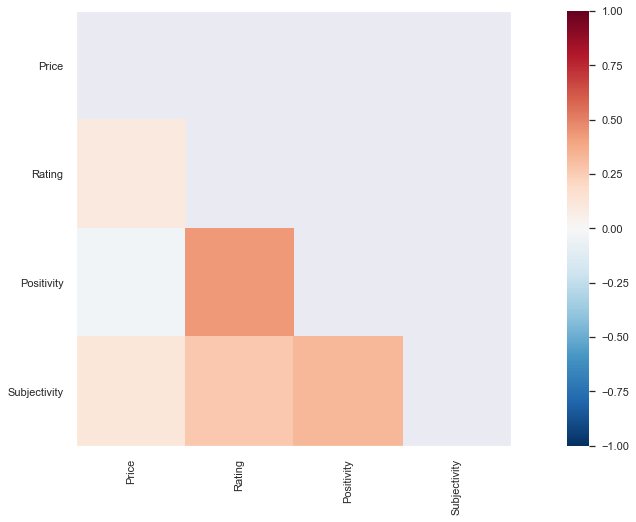

In [627]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = stor[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [628]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(stor['Rating'],stor['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(stor['Subjectivity'],stor['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(stor['Rating'],stor['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.433
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: 0.335
Subjectivity/Positivity Probability is: 0.004
Subjectivity/Rating R is: 0.269
Subjectivity/Rating Probability is: 0.023


In [629]:
with open("M4-6.txt", "r"):
    print(open("M4-6.txt", "r").read())

The storage of the iphone was found to have a lowered subjectivity score with a relatively neutral positivity score over the time series analysis, with little variance. Most of the reviews were slightly decreasing for subjectivity. The scores for both positivity and subjectivity were relatively steady with a sharp decrease in January 2019.

As price increased, positivity had no decrease nor decrease. It was nearly completely steady.

As subjectivity increased, positivity increased along with it. This indicated that the more opinionated people were about the appearance, the more positive those opinions were.

The histogram about appearance was very much uniform for positivity and subjectivity with a large emergence at 0. This could very well be because we could not parse through reviews of other languages. This same explanation could hold true for subjectivity too.

Correlation testing found some slight to moderately strong links, most intensely so between positivity and rating, with an

# Software

In [630]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
soft['Score'] = soft['Review'].apply(ss)
soft['Positivity'] = soft['Score'].apply(lambda x:x[0])
soft['Subjectivity'] = soft['Score'].apply(lambda x:x[1])
soft['Topic'] = 'Storage'
soft.sample(n=2)

Item #  Brand                                              Model  \
2563  B07753NSQZ  Apple  Apple iPhone 8, GSM Unlocked, 256GB - Space Gr...   
4922  B07RT1X4FJ  Apple  Apple iPhone XS, 256GB, Gray - For AT&T (Renewed)   

      Reviews   Price  Rating       Date  Verified  \
2563       96  379.99       5 2019-09-26      True   
4922      198    0.00       4 2019-07-20     False   

                                Review Title  \
2563  iPhone 8 256GB Space Gray Unlocked GSM   
4922                                   3.9/5   

                                                 Review  Helpful  \
2563  iphon 8 256gb space gray unlock gsm came box 1...      5.0   
4922  arriv today seem problem realli littl bit scra...     19.0   

                                         Score  Positivity  Subjectivity  \
2563  (0.28257575757575754, 0.510966810966811)    0.282576      0.510967   
4922                (0.19999999999999998, 0.5)    0.200000      0.500000   

        Topic  
2563  Storage  
4922  Storage

In [631]:
soft.describe()

Reviews       Price      Rating     Helpful  Positivity  \
count  467.000000  467.000000  467.000000  467.000000  467.000000   
mean   263.104925  169.558501    3.021413   20.419700    0.167599   
std    152.163354  247.879025    1.774755   55.148682    0.225468   
min      1.000000    0.000000    1.000000    1.000000   -0.700000   
25%    176.000000    0.000000    1.000000    1.000000    0.007273   
50%    230.000000    0.000000    3.000000    3.000000    0.136364   
75%    436.000000  271.840000    5.000000   10.000000    0.291393   
max    452.000000  749.990000    5.000000  442.000000    1.000000   

       Subjectivity  
count    467.000000  
mean       0.444889  
std        0.216653  
min        0.000000  
25%        0.335417  
50%        0.462626  
75%        0.582804  
max        1.000000

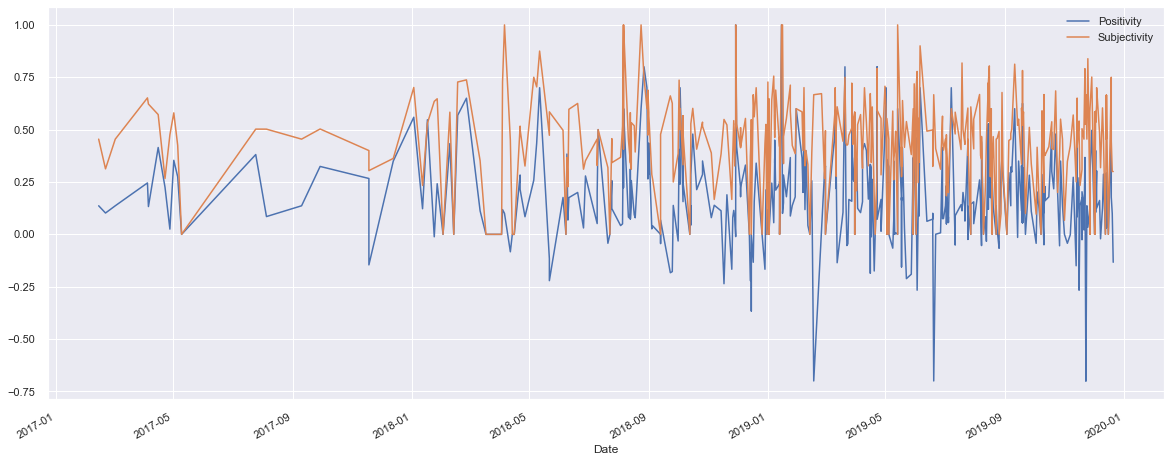

In [632]:
#Time series
soft_ts = soft.plot(x='Date', y=ylist)

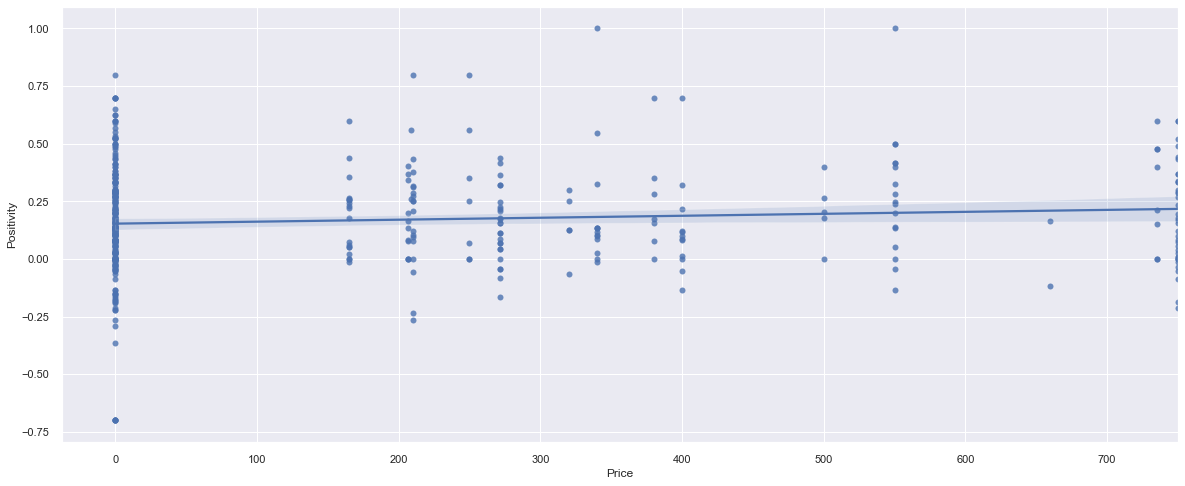

In [633]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=soft)

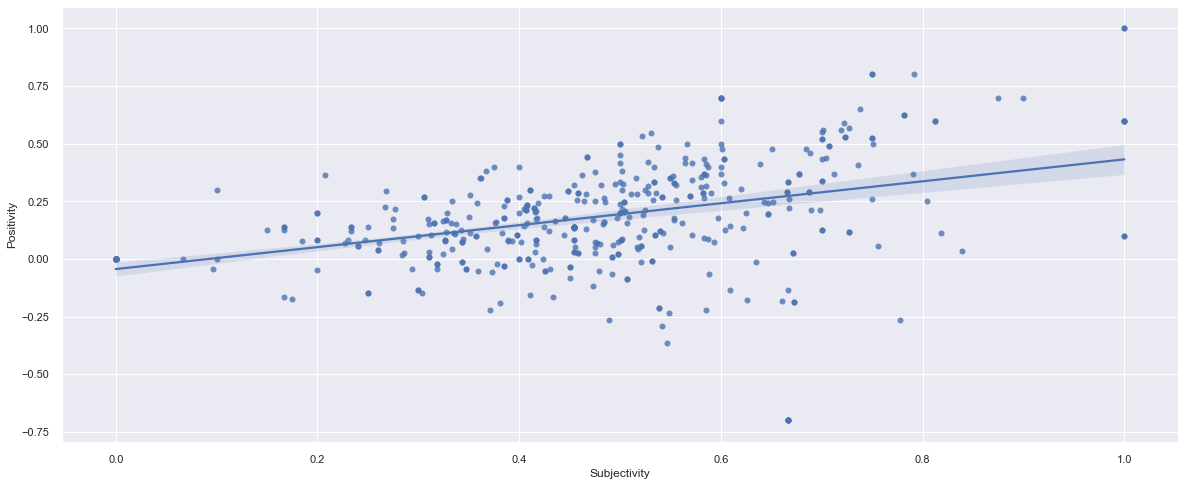

In [634]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=soft)

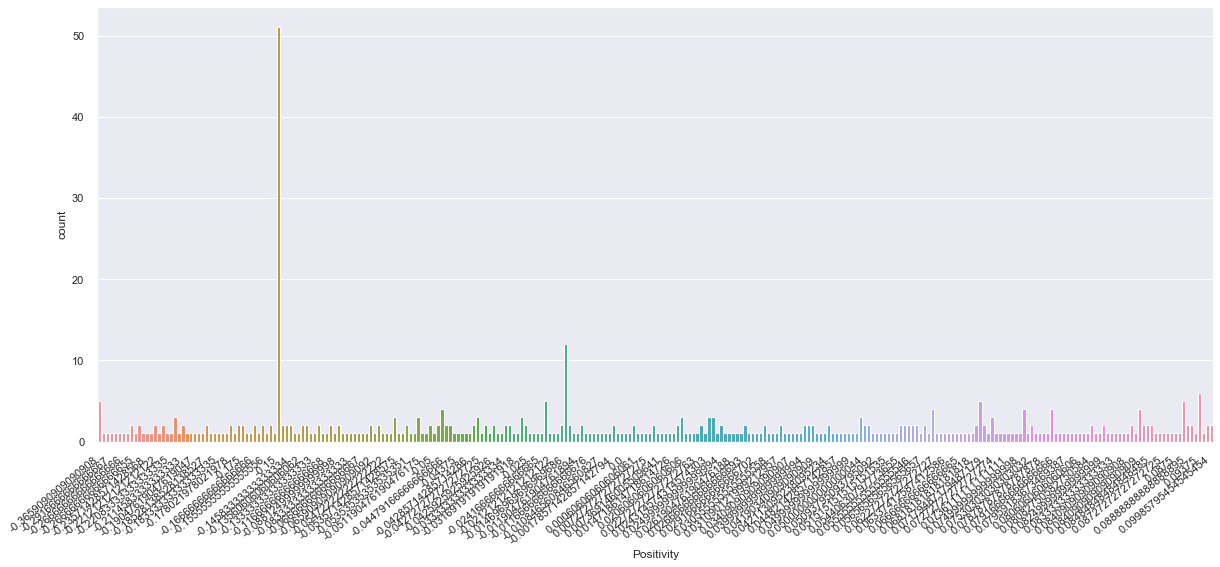

In [635]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(soft['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

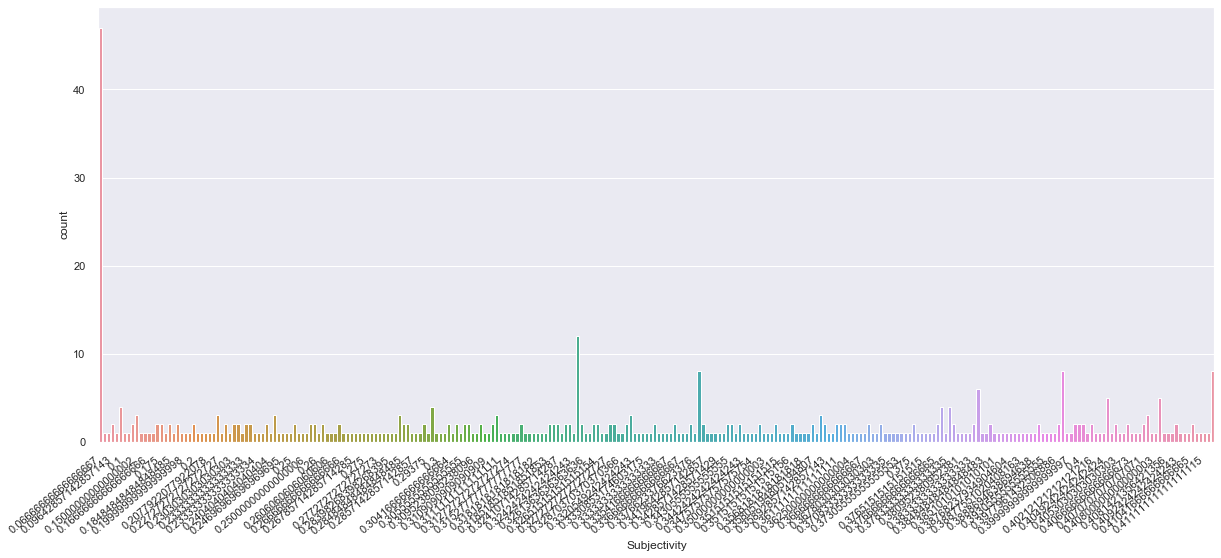

In [636]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(soft['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 6.59990000e+02,  5.00000000e+00,  1.63915470e-01,
         4.35858586e-01],
       [ 6.59990000e+02,  3.00000000e+00, -1.16666667e-01,
         4.72916667e-01],
       [ 0.00000000e+00,  1.00000000e+00,  2.66666667e-01,
         4.00000000e-01],
       ...,
       [ 0.00000000e+00,  1.00000000e+00, -2.12121212e-02,
         3.18181818e-01],
       [ 2.49990000e+02,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00, -2.91666667e-01,
         5.41666667e-01]])

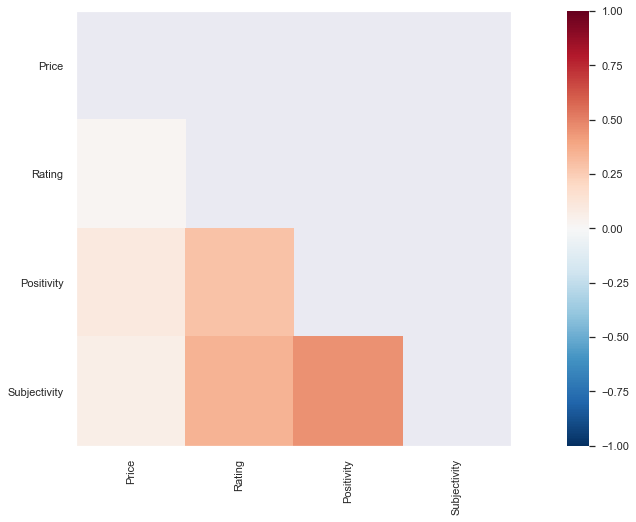

In [637]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = soft[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [638]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(soft['Rating'],soft['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(soft['Subjectivity'],soft['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(soft['Rating'],soft['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.29
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: 0.457
Subjectivity/Positivity Probability is: 0.0
Subjectivity/Rating R is: 0.344
Subjectivity/Rating Probability is: 0.0


In [639]:
with open("M4-7.txt", "r"):
    print(open("M4-7.txt", "r").read())

The software of the iphone was found to have a neutral positivity and subjectivity scores. Both terms had some variance, but positivity had some major drops twice in 2019 and once in early 2020.

As price increased, positivity had no decrease nor decrease. It was nearly completely steady.

As subjectivity increased, positivity increased along with it. This indicated that the more opinionated people were about the appearance, the more positive those opinions were.

The histogram about appearance was very much uniform for positivity and subjectivity with a large emergence at 0. This could very well be because we could not parse through reviews of other languages. This same explanation could hold true for subjectivity too.

Correlation testing found some slight to moderately strong links, most intensely so between positivity and subjectivity. The links between rating and positivity scored .29. Finally, subjectivity and rating scored .344. The associated p-value of all three of these corre

# Music

In [640]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
musi['Score'] = musi['Review'].apply(ss)
musi['Positivity'] = musi['Score'].apply(lambda x:x[0])
musi['Subjectivity'] = musi['Score'].apply(lambda x:x[1])
musi['Topic'] = 'Music'
musi.sample(n=2)

Item #  Brand                                              Model  \
4846  B07RT1X4FJ  Apple  Apple iPhone XS, 256GB, Gray - For AT&T (Renewed)   
1335  B06XRJQX91  Apple  Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...   

      Reviews   Price  Rating       Date  Verified     Review Title  \
4846      198    0.00       1 2019-10-08      True  Not satisfied..   
1335      427  271.84       4 2018-03-07      True       Four Stars   

                                                 Review  Helpful  \
4846      return next day speaker phone work disappoint      3.0   
1335  everyth good sound would turn even silent mode...      3.0   

                                         Score  Positivity  Subjectivity  \
4846                                (0.0, 0.0)    0.000000      0.000000   
1335  (0.3666666666666667, 0.3666666666666667)    0.366667      0.366667   

      Topic  
4846  Music  
1335  Music

In [641]:
musi.describe()

Reviews       Price      Rating     Helpful  Positivity  \
count  107.000000  107.000000  107.000000  107.000000  107.000000   
mean   259.242991  184.401589    2.897196   23.252336    0.195246   
std    162.114439  252.056114    1.642218   71.045839    0.211141   
min      1.000000    0.000000    1.000000    1.000000   -0.500000   
25%     98.500000    0.000000    1.000000    1.000000    0.058333   
50%    230.000000    0.000000    3.000000    3.000000    0.211508   
75%    427.000000  271.840000    5.000000    8.000000    0.333566   
max    452.000000  749.990000    5.000000  483.000000    1.000000   

       Subjectivity  
count    107.000000  
mean       0.466432  
std        0.200172  
min        0.000000  
25%        0.385101  
50%        0.454167  
75%        0.571654  
max        1.000000

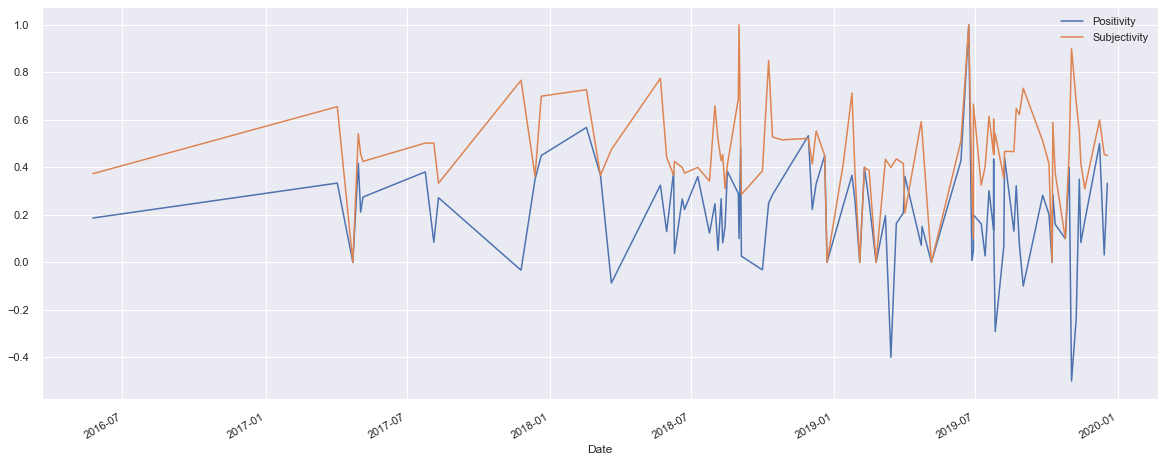

In [642]:
#Time series
musi_ts = musi.plot(x='Date', y=ylist)

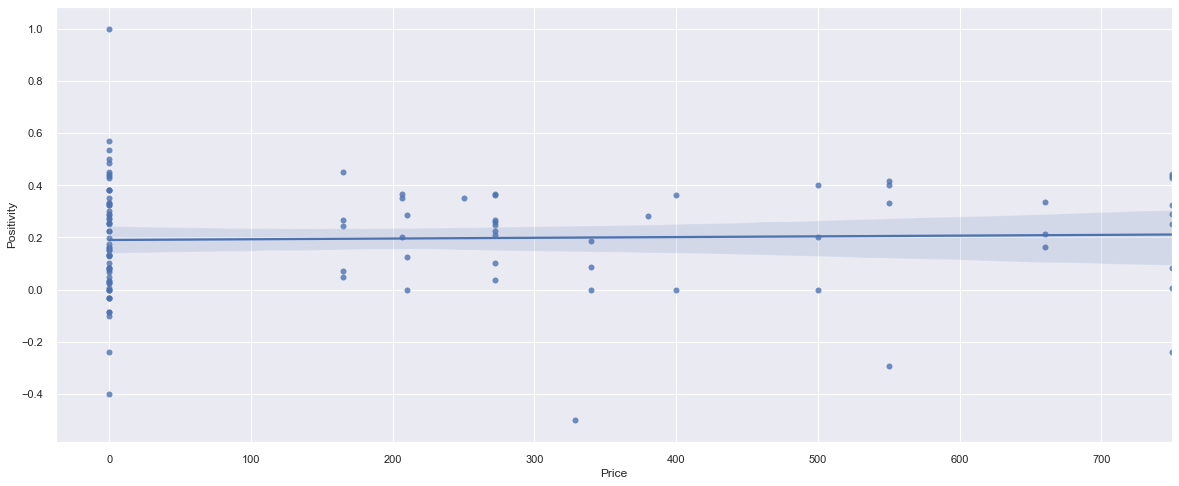

In [643]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=musi)

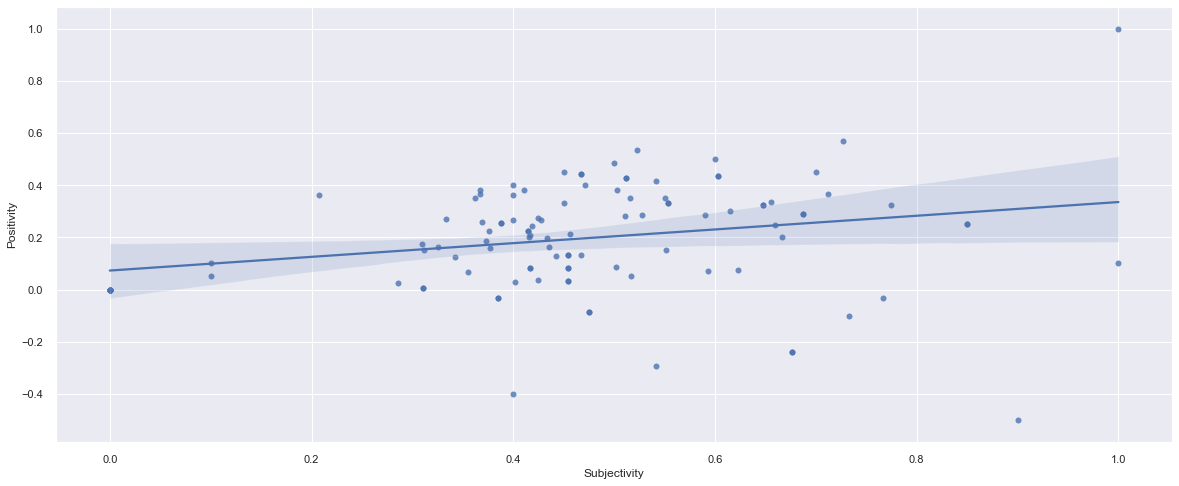

In [644]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=musi)

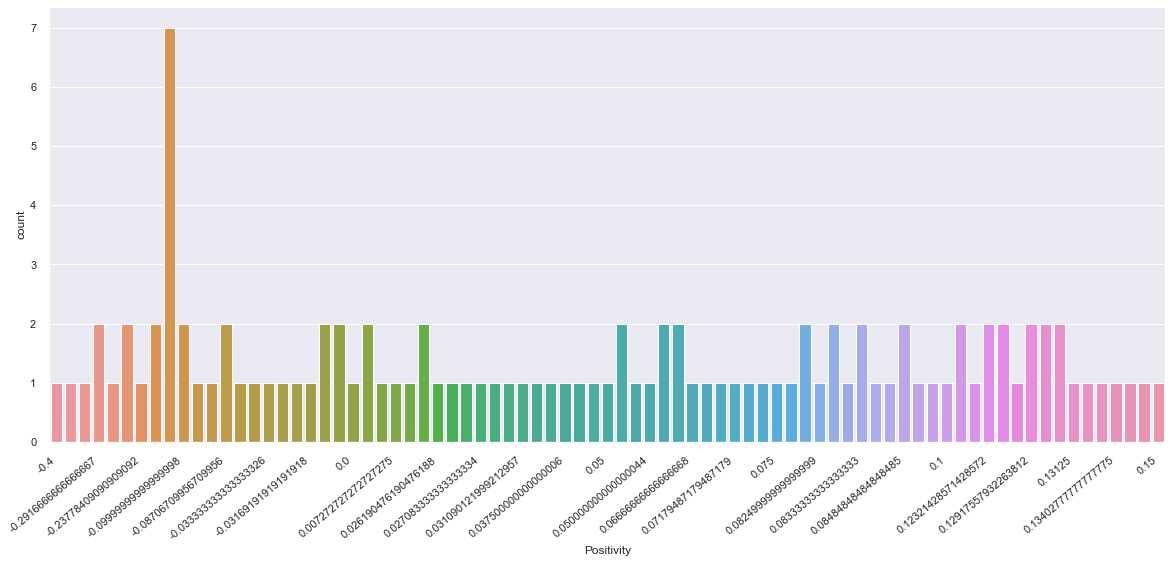

In [645]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(musi['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

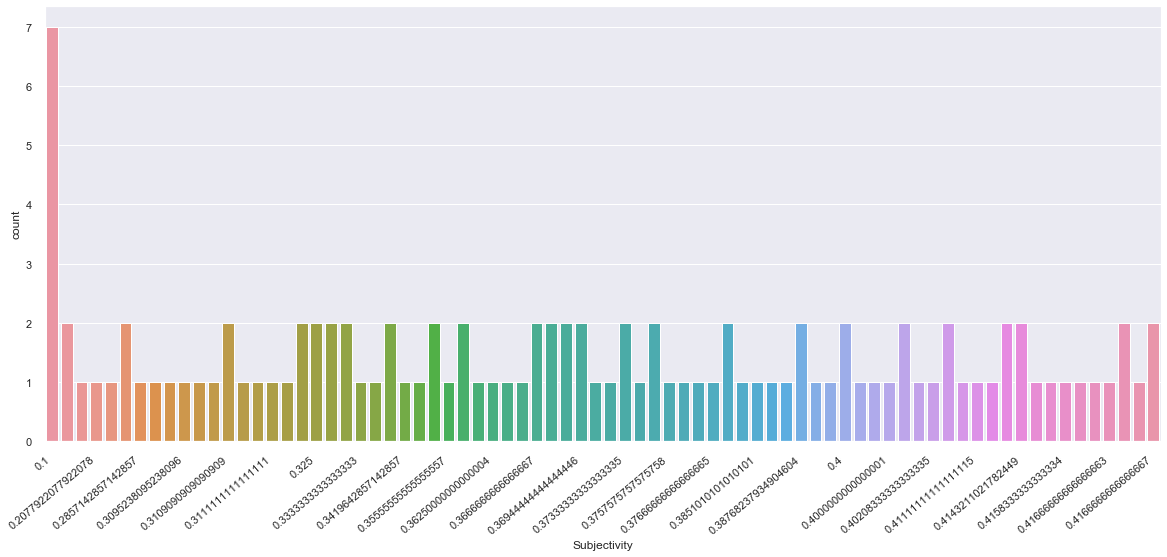

In [646]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(musi['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 6.59990000e+02,  5.00000000e+00,  3.33799534e-01,
         6.55827506e-01],
       [ 6.59990000e+02,  5.00000000e+00,  1.63915470e-01,
         4.35858586e-01],
       [ 6.59990000e+02,  1.00000000e+00,  2.11507937e-01,
         4.55952381e-01],
       [ 0.00000000e+00,  5.00000000e+00,  1.29175579e-01,
         4.42497029e-01],
       [ 0.00000000e+00,  2.00000000e+00,  2.61904762e-02,
         2.85714286e-01],
       [ 3.39990000e+02,  2.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.39990000e+02,  3.00000000e+00,  1.86666667e-01,
         3.73333333e-01],
       [ 3.39990000e+02,  1.00000000e+00,  8.48484848e-02,
         5.02272727e-01],
       [ 0.00000000e+00,  1.00000000e+00,  1.31250000e-01,
         4.66666667e-01],
       [ 0.00000000e+00,  5.00000000e+00,  4.50000000e-01,
         7.00000000e-01],
       [ 3.99990000e+02,  2.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.99990000e+02,  3.00000000e+00,  3.61111111e-01,
      

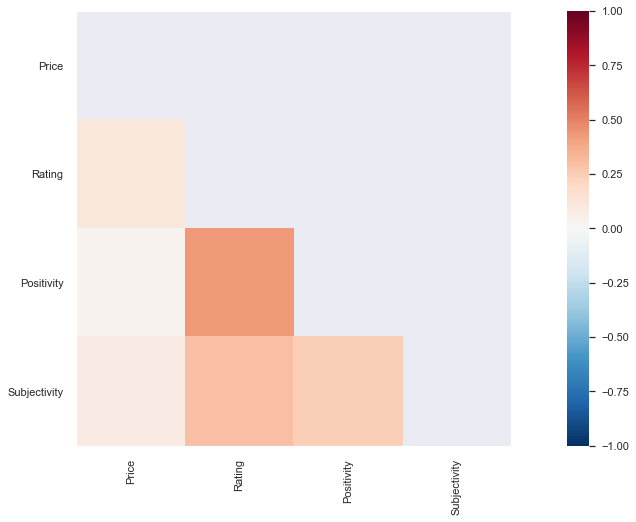

In [647]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = musi[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [648]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(musi['Rating'],musi['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(musi['Subjectivity'],musi['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(musi['Rating'],musi['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.431
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: 0.249
Subjectivity/Positivity Probability is: 0.01
Subjectivity/Rating R is: 0.298
Subjectivity/Rating Probability is: 0.002


In [649]:
with open("M4-8.txt", "r"):
    print(open("M4-8.txt", "r").read())

The music of the iphone was found to have a slightly decreased positivity and an increased subjectivity score. They both appeared to be quite neutral until the last year when variance increased. This could perhaps be due to a potential increased number of reviews as of recently.

As price increased, positivity had no decrease nor decrease. It was nearly completely steady.

As subjectivity increased, positivity slightly increased along with it. This indicated that the more opinionated people were about the appearance, the more positive those opinions were, albeit not as much as that of other aspects.

The histogram about appearance was very much uniform for positivity and subjectivity with a large emergence at 0. This could very well be because we could not parse through reviews of other languages. This same explanation could hold true for subjectivity too.

Correlation testing found some slight to moderately strong links, most intensely so between positivity and rating at .431 and a p-

# Screen

In [650]:
#Adding sentiment analysis and slicing the positivity/negativity scores columns.
scre['Score'] = scre['Review'].apply(ss)
scre['Positivity'] = scre['Score'].apply(lambda x:x[0])
scre['Subjectivity'] = scre['Score'].apply(lambda x:x[1])
scre['Topic'] = 'Screen'
scre.sample(n=2)

Item #  Brand                                              Model  \
3602  B0775H5HJW  Apple  Apple iPhone X, GSM Unlocked, 256GB - Silver (...   
3260  B077578W38  Apple  Apple iPhone X, Unlocked 5.8", 64GB - Space Gr...   

      Reviews  Price  Rating       Date  Verified      Review Title  \
3602      139  735.0       4 2019-06-13      True      Good product   
3260      442    0.0       5 2019-12-03      True  Very great phone   

                                                 Review  Helpful  \
3602                       far issu coupl minor scratch      1.0   
3260  littl apprehens read review glad went ahead bo...      1.0   

              Score  Positivity  Subjectivity   Topic  
3602   (0.025, 0.6)       0.025        0.6000  Screen  
3260  (0.4, 0.5875)       0.400        0.5875  Screen

In [651]:
scre.describe()

Reviews       Price      Rating     Helpful  Positivity  \
count  474.000000  474.000000  474.000000  474.000000  474.000000   
mean   272.274262  171.931814    3.223629   28.025316    0.182054   
std    156.833130  259.967571    1.751046   74.132099    0.241440   
min      1.000000    0.000000    1.000000    1.000000   -0.700000   
25%    176.000000    0.000000    1.000000    1.000000    0.000606   
50%    230.000000    0.000000    4.000000    3.000000    0.157478   
75%    436.000000  271.840000    5.000000   12.000000    0.330019   
max    452.000000  749.990000    5.000000  673.000000    1.000000   

       Subjectivity  
count    474.000000  
mean       0.452994  
std        0.223343  
min        0.000000  
25%        0.345682  
50%        0.479616  
75%        0.584492  
max        1.000000

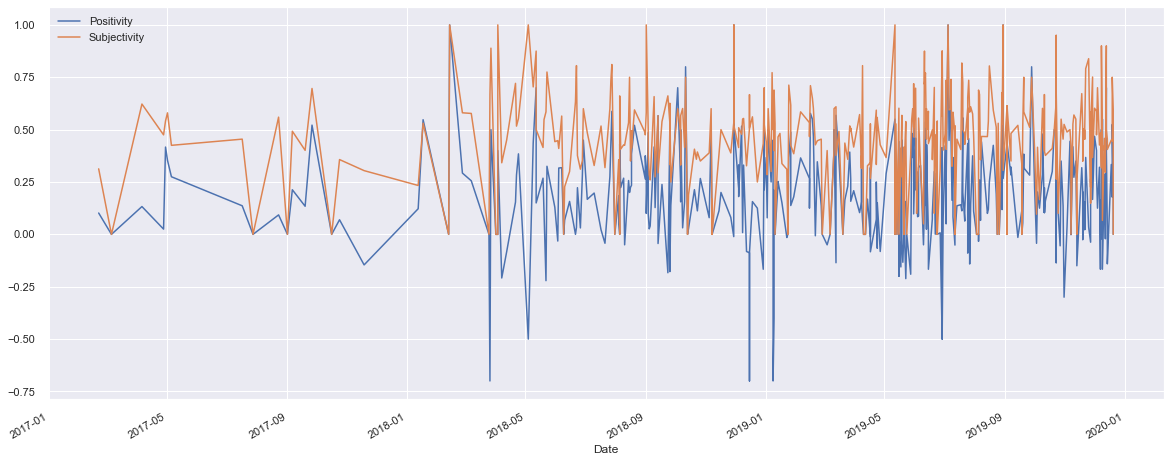

In [652]:
#Time series
scre_ts = scre.plot(x='Date', y=ylist)

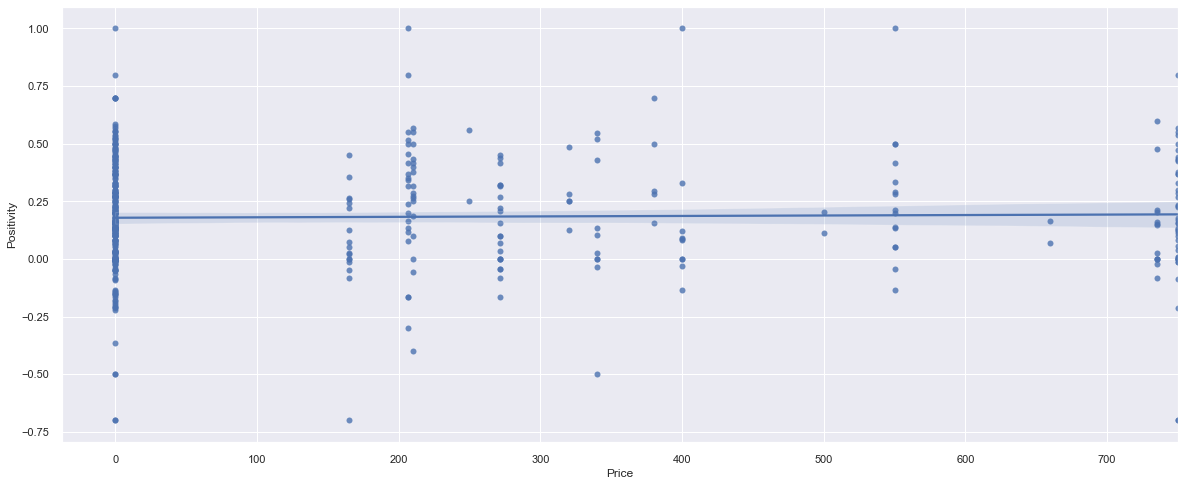

In [653]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=scre)

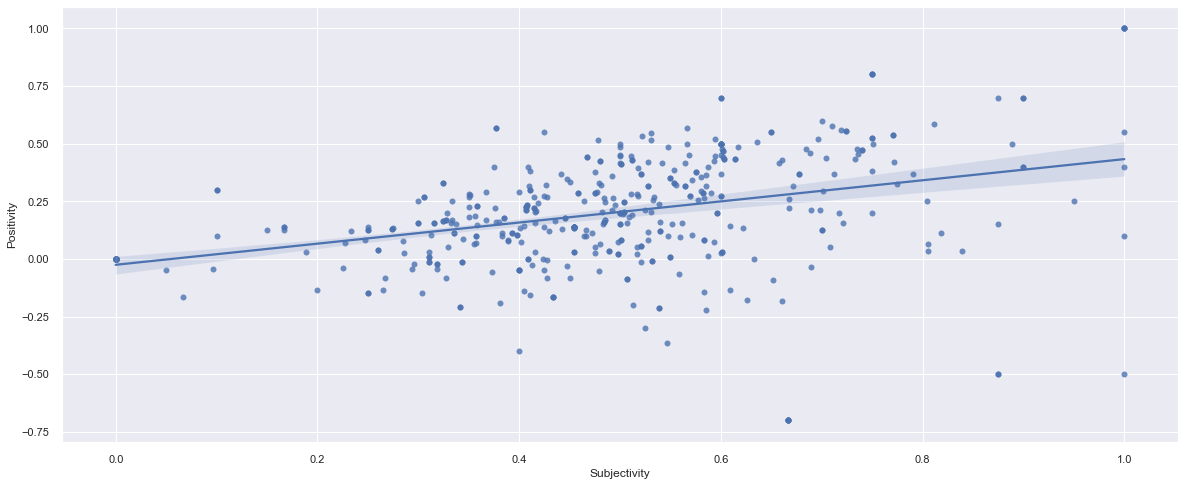

In [654]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=scre)

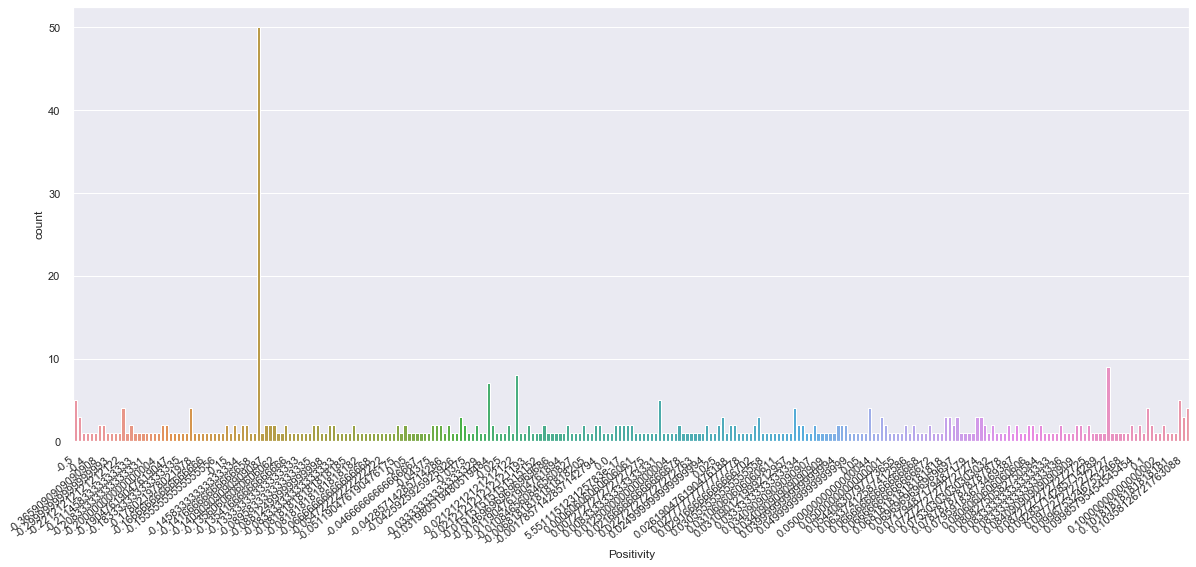

In [655]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(scre['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

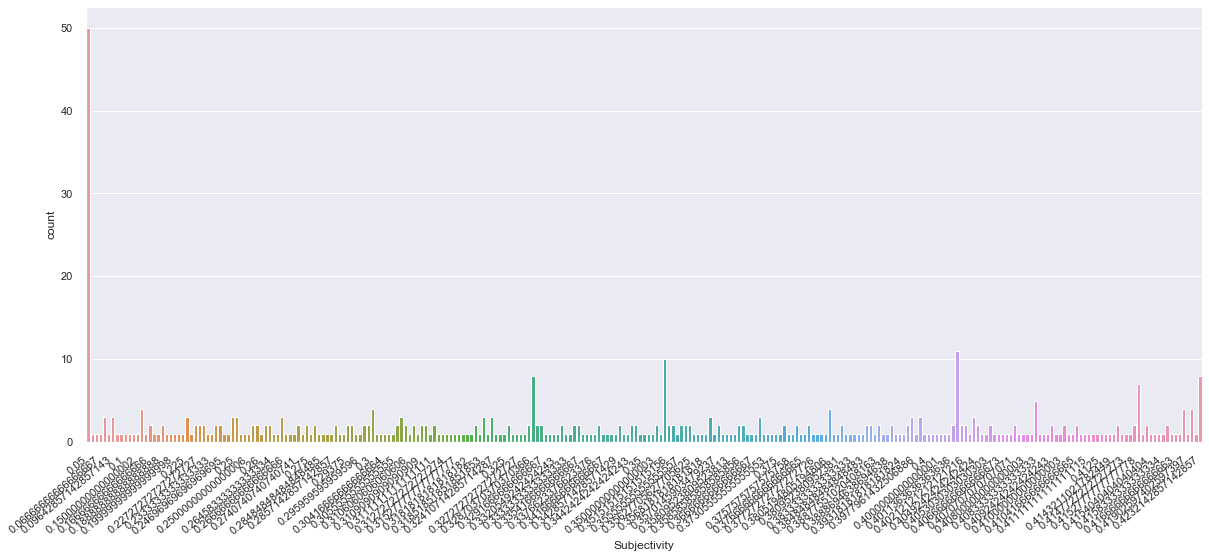

In [656]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(scre['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 3
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 0.00000000e+00,  5.00000000e+00,  2.66666667e-01,
         3.50000000e-01],
       [ 0.00000000e+00,  1.00000000e+00,  1.25000000e-02,
         5.87500000e-01],
       [ 6.59990000e+02,  1.00000000e+00,  6.96969697e-02,
         3.57014590e-01],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e-01,
         5.96296296e-01],
       [ 0.00000000e+00,  5.00000000e+00,  5.56565657e-01,
         7.23737374e-01],
       [ 0.00000000e+00,  1.00000000e+00, -2.12121212e-02,
         3.18181818e-01]])

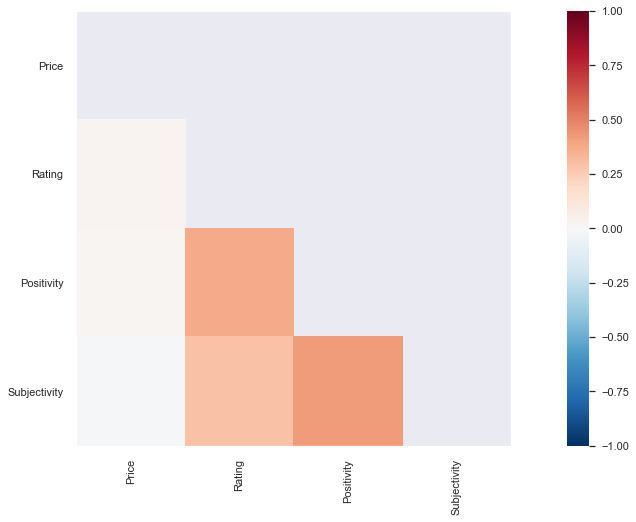

In [657]:
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = scre[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://soft.png") # Draw/show/poof the data

In [658]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(scre['Rating'],scre['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(scre['Subjectivity'],scre['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(scre['Rating'],scre['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.381
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: 0.424
Subjectivity/Positivity Probability is: 0.0
Subjectivity/Rating R is: 0.292
Subjectivity/Rating Probability is: 0.0


In [659]:
with open("M4-9.txt", "r"):
    print(open("M4-9.txt", "r").read())

The screen of the iphone was found to have a slightly increased positivity and ubjectivity scores. It appeared that the positivity scores had multiple drops in 2018 and 2019 but in more recent years, the positivity of these reviews have increased.

As price increased, positivity had no decrease nor decrease. It was nearly completely steady.

As subjectivity increased, positivity slightly increased along with it. This indicated that the more opinionated people were about the appearance, the more positive those opinions were, albeit not as much as that of other aspects.

The histogram about appearance was very much uniform for positivity and subjectivity with a large emergence at 0. This could very well be because we could not parse through reviews of other languages. This same explanation could hold true for subjectivity too.

Correlation testing found some slight to moderately strong links, most intensely so between positivity and subjectivity at .424. The links between rating and posi

# Merging the dataframes together again.

In [660]:
#Merging the dataframes in one..
a_df = [appe, batt, came, spee, stor, soft, musi, scre]
a_df = pd.concat(a_df, axis=0, join='inner').reset_index()

In [661]:
a_df.sample(n=2)

index      Item #  Brand  \
631    4778  B07RDMLR4V  Apple   
1285   4672  B07RDMLR4V  Apple   

                                                  Model  Reviews  Price  \
631   Apple iPhone XS Max, 256GB, Gray - For AT&T (R...      230    0.0   
1285  Apple iPhone XS Max, 256GB, Gray - For AT&T (R...      230    0.0   

      Rating       Date  Verified  \
631        4 2019-09-18     False   
1285       5 2019-11-04      True   

                                       Review Title  \
631   Creative Focus yet delivers on most aspects .   
1285                                      Great buy   

                                                 Review  Helpful  \
631   product second iphon own sinc screen came ole ...      3.0   
1285  got phone june happier came like new condit ba...      3.0   

                                             Score  Positivity  Subjectivity  \
631                   (0.1125, 0.3354166666666667)    0.112500      0.335417   
1285  (-0.042727272727272725, 0.34757575757575754)   -0.042727      0.347576   

        Topic  
631    Camera  
1285  Storage

In [662]:
a_df.describe()

index      Reviews        Price       Rating      Helpful  \
count  1903.000000  1903.000000  1903.000000  1903.000000  1903.000000   
mean   2714.483447   264.303205   177.740053     3.269049    26.251182   
std    1502.028521   156.892064   256.262791     1.725702    72.335167   
min       0.000000     1.000000     0.000000     1.000000     1.000000   
25%    1344.000000   153.000000     0.000000     1.000000     1.000000   
50%    2954.000000   230.000000     0.000000     4.000000     3.000000   
75%    3993.000000   436.000000   271.840000     5.000000    11.000000   
max    4948.000000   452.000000   749.990000     5.000000   990.000000   

        Positivity  Subjectivity  
count  1903.000000   1903.000000  
mean      0.183615      0.454295  
std       0.228223      0.209322  
min      -1.000000      0.000000  
25%       0.030556      0.356385  
50%       0.163915      0.472917  
75%       0.325631      0.582274  
max       1.000000      1.000000

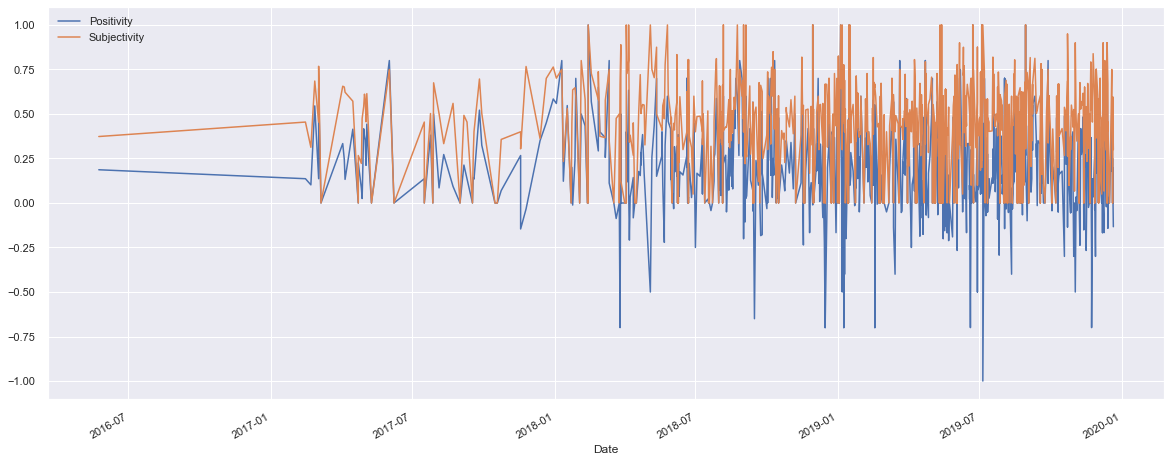

In [663]:
#Time series info
a_df_ts = a_df.plot(x='Date', y=ylist)

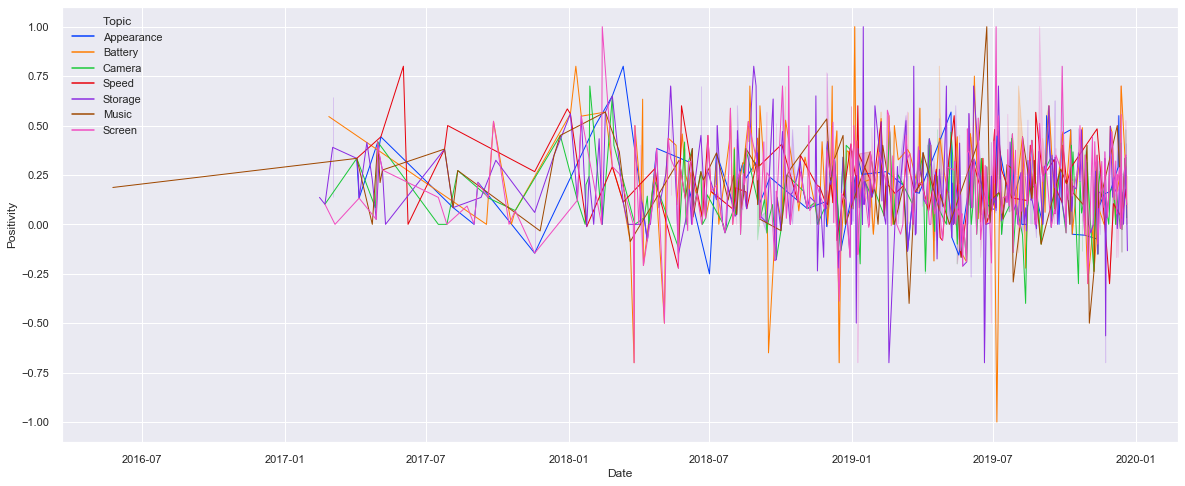

In [665]:
#Time series info
# ylist2 = ['appe','batte','soft','came','musi','spee', 'scre', 'stor']
# a_df_ts = a_df.plot(x='Date', y=ylist2)
sns.lineplot(data=a_df,x='Date',y="Positivity",hue="Topic",palette='bright',lw=1)

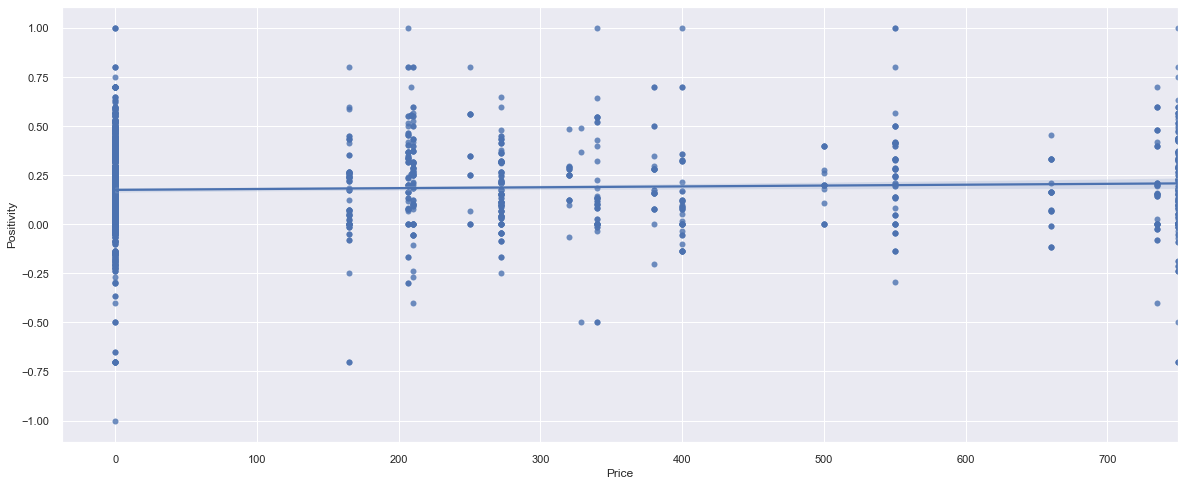

In [666]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=a_df)

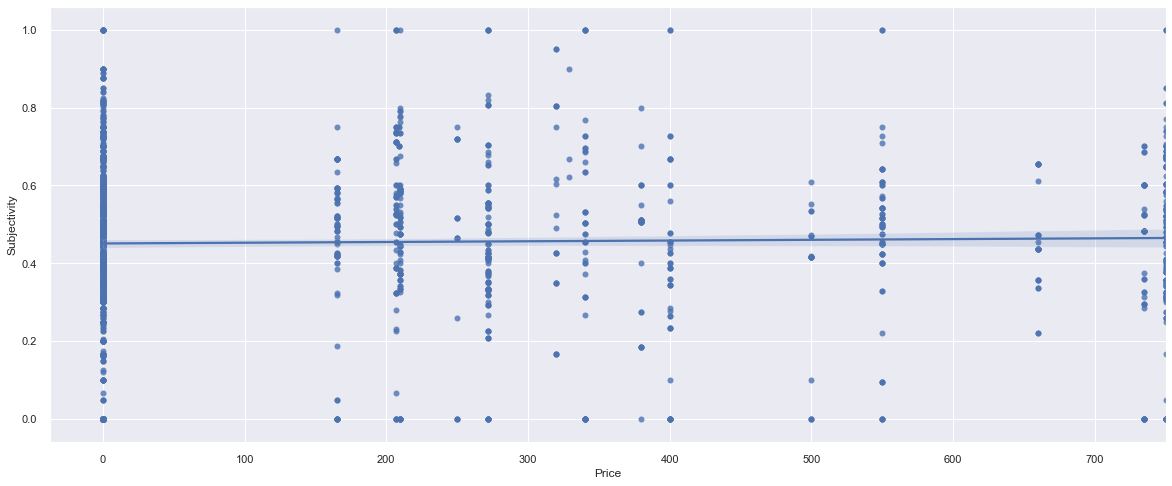

In [667]:
#Linear regression
sns.regplot(x='Price',y="Subjectivity",data=a_df)

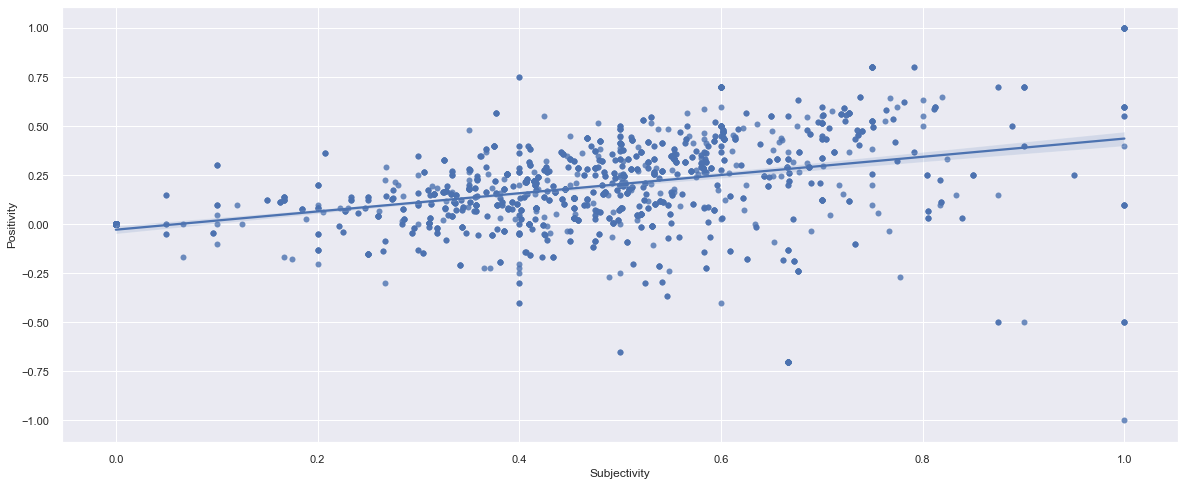

In [668]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=a_df)

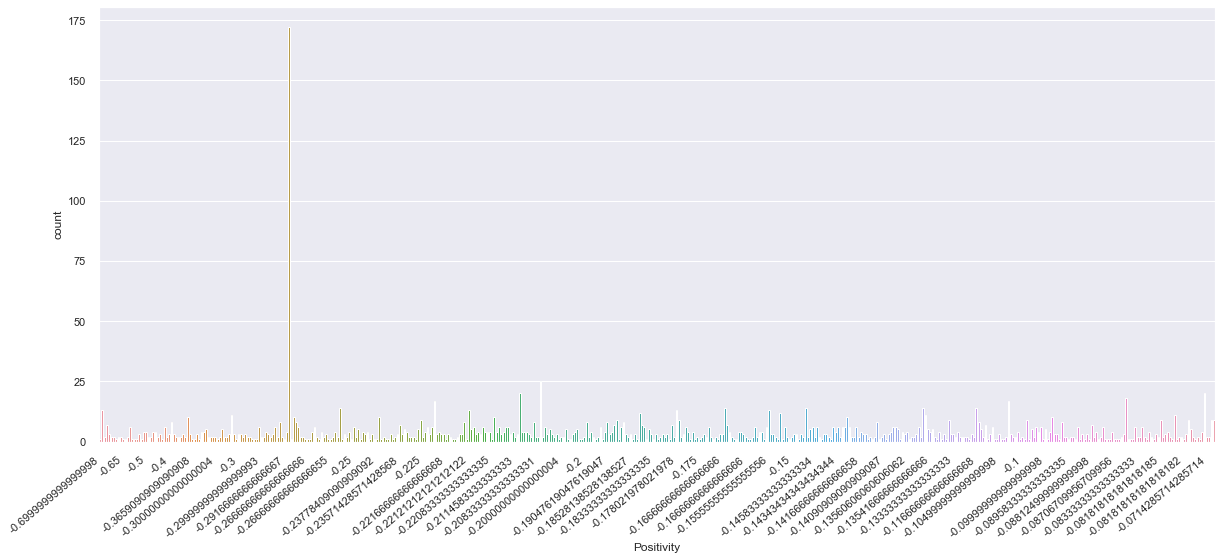

In [669]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(a_df['Positivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

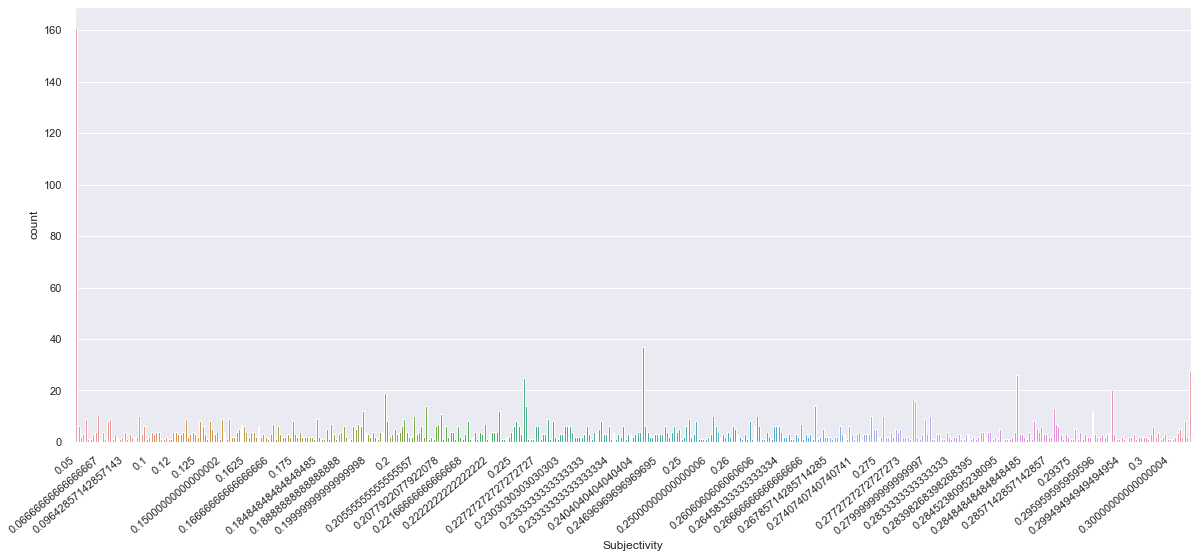

In [670]:
#Histogram
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(a_df['Subjectivity'])
x=[-1,-.75,-5,-.25,0,.25,.5,.75,1]
tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

array([[ 6.59990000e+02,  5.00000000e+00,  3.33799534e-01,
         6.55827506e-01],
       [ 6.59990000e+02,  5.00000000e+00,  1.63915470e-01,
         4.35858586e-01],
       [ 0.00000000e+00,  1.00000000e+00,  3.75000000e-01,
         6.11111111e-01],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  2.00000000e-01,
         5.96296296e-01],
       [ 0.00000000e+00,  5.00000000e+00,  5.56565657e-01,
         7.23737374e-01],
       [ 0.00000000e+00,  1.00000000e+00, -2.12121212e-02,
         3.18181818e-01]])

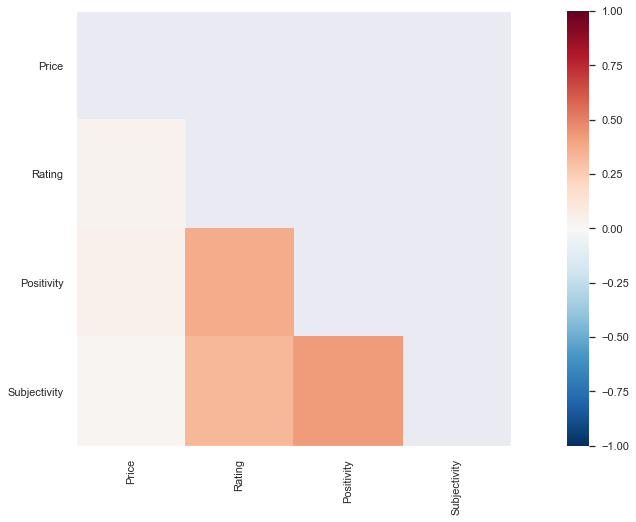

In [671]:
#Correlation map
num_features = ['Price', 'Rating', 'Positivity', 'Subjectivity']
X = a_df[num_features].values
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#visualizer.poof(outpath="c://adf.png") # Draw/show/poof the data

In [672]:
#Finding out R2 info.
r, p = scipy.stats.pearsonr(a_df['Rating'],a_df['Positivity']) #Pearson's R coefficient
print("Rating/Positivity R is: "+str(round(r, 3)))
print("Rating/Positivity Probability is: "+str(round(p, 3)))
#Between Positivity and Subjectivity
r, p = scipy.stats.pearsonr(a_df['Subjectivity'],a_df['Positivity']) #Pearson's R coefficient
print("Subjectivity/Positivity R is: "+str(round(r, 3)))
print("Subjectivity/Positivity Probability is: "+str(round(p, 3)))
#Between Rating and Subjectivity
r, p = scipy.stats.pearsonr(a_df['Rating'],a_df['Subjectivity']) #Pearson's R coefficient
print("Subjectivity/Rating R is: "+str(round(r, 3)))
print("Subjectivity/Rating Probability is: "+str(round(p, 3)))

Rating/Positivity R is: 0.368
Rating/Positivity Probability is: 0.0
Subjectivity/Positivity R is: 0.426
Subjectivity/Positivity Probability is: 0.0
Subjectivity/Rating R is: 0.329
Subjectivity/Rating Probability is: 0.0


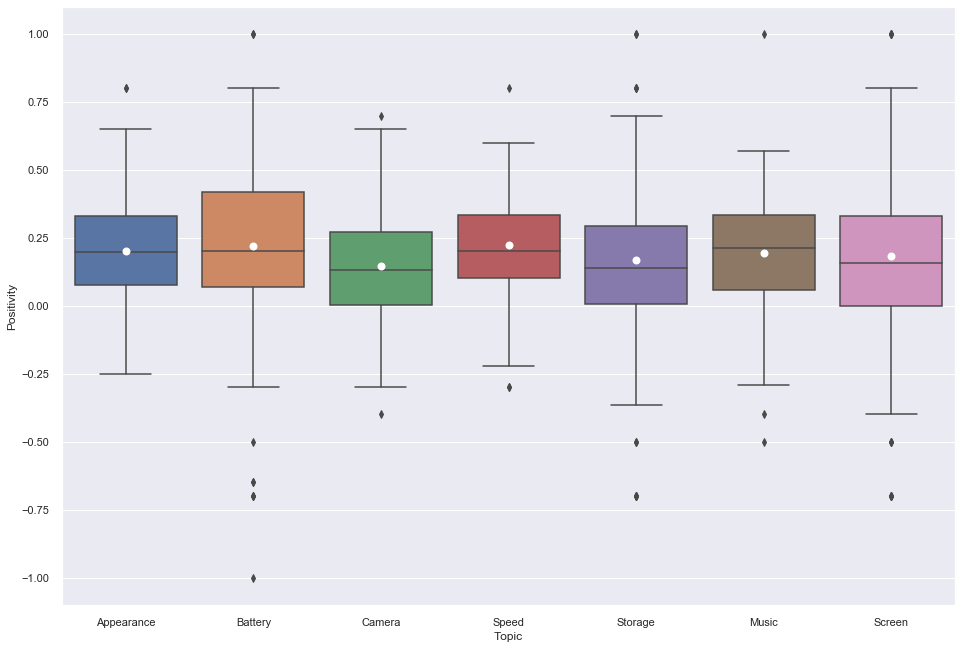

In [673]:
sns.set(rc={'figure.figsize':(16,11)})
sns.boxplot(x="Topic", y='Positivity', data=a_df, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"})

In [674]:
name = ['Appearance','Battery','Camera','Speed','Storage','Software','Music','Screen']
topic = [appe,batt,came,spee,stor,soft,musi,scre]
for x, y in zip(topic,name):
    print ("The Positivity Mean of "+ y + " is: "+ str(round(x['Positivity'].mean(), 3)))

The Positivity Mean of Appearance is: 0.203
The Positivity Mean of Battery is: 0.219
The Positivity Mean of Camera is: 0.145
The Positivity Mean of Speed is: 0.224
The Positivity Mean of Storage is: 0.187
The Positivity Mean of Software is: 0.168
The Positivity Mean of Music is: 0.195
The Positivity Mean of Screen is: 0.182


In [675]:
with open("M4-10.txt", "r"):
    print(open("M4-10.txt", "r").read())

The merged dataframe of the Apple iPhone was found to have a slightly increased positivity and ubjectivity scores. It appeared that the positivity scores had multiple drops in 2018 and 2019 and had the greatest drop in September of 2019, but has recovered since.

As price increased, positivity had no decrease nor decrease. It was nearly completely steady.

As subjectivity increased, positivity slightly increased along with it. This indicated that the more opinionated people were about the appearance, the more positive those opinions were, albeit not as much as that of other aspects.

The histogram about appearance was very much uniform for positivity and subjectivity with a large emergence at 0. This could very well be because we could not parse through reviews of other languages. This same explanation could hold true for subjectivity too.

Correlation testing found some slight to moderately strong links, most intensely so between positivity and subjectivity at .426. The links between 

# Categorical transformation and hyperparameter tuning

In [676]:
#Get dummies categorical values binary
categorical = ['Topic','Item #']
a_df_cat = pd.get_dummies(a_df[categorical],drop_first=True)
a_df_cat.head()

Topic_Battery  Topic_Camera  Topic_Music  Topic_Screen  Topic_Speed  \
0              0             0            0             0            0   
1              0             0            0             0            0   
2              0             0            0             0            0   
3              0             0            0             0            0   
4              0             0            0             0            0   

   Topic_Storage  Item #_B01CR1FQMG  Item #_B01GXAT0CE  Item #_B01JAWWVXW  \
0              0                  1                  0                  0   
1              0                  1                  0                  0   
2              0                  0                  1                  0   
3              0                  0                  1                  0   
4              0                  0                  1                  0   

   Item #_B01LYHIUQ7  ...  Item #_B07HKQ61NV  Item #_B07KFNRQ5S  \
0                  0  ...                  0                  0   
1                  0  ...                  0                  0   
2                  0  ...                  0                  0   
3                  0  ...                  0                  0   
4                  0  ...                  0                  0   

   Item #_B07KKL5KGG  Item #_B07P6Y8L3F  Item #_B07Q6VQ147  Item #_B07RDMLR4V  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Item #_B07RKYQSRB  Item #_B07RT1X4FJ  Item #_B07SVPKTYK  Item #_B07ZPKZSSC  
0                  0                  0                  0                  0  
1                  0                  0                  0                  0  
2                  0                  0                  0                  0  
3                  0                  0                  0                  0  
4                  0                  0                  0                  0  

[5 rows x 57 columns]

In [677]:
#Listing the columns
list(a_df_cat.columns)

['Topic_Battery',
 'Topic_Camera',
 'Topic_Music',
 'Topic_Screen',
 'Topic_Speed',
 'Topic_Storage',
 'Item #_B01CR1FQMG',
 'Item #_B01GXAT0CE',
 'Item #_B01JAWWVXW',
 'Item #_B01LYHIUQ7',
 'Item #_B01N4IHGHI',
 'Item #_B01N4R20RS',
 'Item #_B01N9I0RWL',
 'Item #_B01N9YO1DS',
 'Item #_B06X9X15Y8',
 'Item #_B06XGLHP8V',
 'Item #_B06XR1K6HR',
 'Item #_B06XR8G1TX',
 'Item #_B06XRG6S73',
 'Item #_B06XRJQX91',
 'Item #_B06XRJXL3R',
 'Item #_B06XRN4RWL',
 'Item #_B06XS3CTJM',
 'Item #_B06XS4978K',
 'Item #_B071JPQYGK',
 'Item #_B071W9WQ8M',
 'Item #_B0731HBTZ7',
 'Item #_B0732NTJ2M',
 'Item #_B0743HD6MS',
 'Item #_B07643YNY8',
 'Item #_B076KC34PM',
 'Item #_B07753NSQZ',
 'Item #_B0775451TT',
 'Item #_B07755LZ67',
 'Item #_B07756QYST',
 'Item #_B0775717ZP',
 'Item #_B077578VXH',
 'Item #_B077578W38',
 'Item #_B0775H5HJW',
 'Item #_B077NJQPGB',
 'Item #_B077NTKFDB',
 'Item #_B078WZ86Y9',
 'Item #_B079HB518K',
 'Item #_B07CGMQDXW',
 'Item #_B07CZR8YV4',
 'Item #_B07D6TQP6F',
 'Item #_B07G7FG26

In [678]:
#Getting the list from columns
a_df[list(a_df_cat.columns)] = a_df_cat[list(a_df_cat.columns)]

In [679]:
#Reviewing the new dataset
a_df.sample(n=2)

index      Item #  Brand  \
1498    871  B06XR8G1TX  Apple   
203    2653  B0775451TT  Apple   

                                                  Model  Reviews   Price  \
1498  Apple iPhone 6S, 64GB, Space Gray - Fully Unlo...      394  165.00   
203   Apple iPhone X, 256GB, Silver - For AT&T / T-M...      436  749.99   

      Rating       Date  Verified                        Review Title  ...  \
1498       5 2018-08-31      True       Excellent Value for the Money  ...   
203        2 2019-01-02      True  The phone had a temperature error!  ...   

     Item #_B07HKQ61NV  Item #_B07KFNRQ5S Item #_B07KKL5KGG  \
1498                 0                  0                 0   
203                  0                  0                 0   

      Item #_B07P6Y8L3F  Item #_B07Q6VQ147 Item #_B07RDMLR4V  \
1498                  0                  0                 0   
203                   0                  0                 0   

      Item #_B07RKYQSRB  Item #_B07RT1X4FJ  Item #_B07SVPKTYK  \
1498                  0                  0                  0   
203                   0                  0                  0   

      Item #_B07ZPKZSSC  
1498                  0  
203                   0  

[2 rows x 73 columns]

In [680]:
#Cleaning the new datasets of columns we no longer need.
del a_df['Item #']
del a_df['Model']
del a_df['Review']
del a_df['Topic']
del a_df['index']
del a_df['Date']
a_df.sample(n=2)

Brand  Reviews   Price  Rating  Verified  \
57    Apple      436  749.99       4      True   
1574  Apple      193    0.00       4      True   

                          Review Title  Helpful  \
57    Not perfect but worth the price.      1.0   
1574       Okay quality for the price.      1.0   

                                         Score  Positivity  Subjectivity  ...  \
57    (0.179004329004329, 0.35064935064935066)    0.179004      0.350649  ...   
1574                           (0.1625, 0.325)    0.162500      0.325000  ...   

      Item #_B07HKQ61NV  Item #_B07KFNRQ5S  Item #_B07KKL5KGG  \
57                    0                  0                  0   
1574                  0                  0                  0   

      Item #_B07P6Y8L3F  Item #_B07Q6VQ147  Item #_B07RDMLR4V  \
57                    0                  0                  0   
1574                  0                  0                  0   

      Item #_B07RKYQSRB  Item #_B07RT1X4FJ  Item #_B07SVPKTYK  \
57                    0                  0                  0   
1574                  0                  0                  0   

      Item #_B07ZPKZSSC  
57                    0  
1574                  0  

[2 rows x 67 columns]

In [681]:
del a_df['Score']
a_df['Price'] = a_df['Price']/a_df['Price'].max()
a_df['Rating'] = a_df['Rating']/a_df['Rating'].max()
a_df.head()

Brand  Reviews     Price  Rating  Verified  \
0  Apple        1  0.879998     1.0      True   
1  Apple        1  0.879998     1.0      True   
2  Apple        2  0.000000     0.2      True   
3  Apple        2  0.000000     1.0      True   
4  Apple        2  0.000000     1.0      True   

                                        Review Title  Helpful  Positivity  \
0                                   All good so far.      1.0    0.333800   
1                                    Super Satisfied     40.0    0.163915   
2                   It seems like it has been stolen    990.0    0.375000   
3                          Much Better Than Expected     93.0    0.180205   
4  Excellent refurbished (or new??) iPhone se fro...     76.0    0.256876   

   Subjectivity  Topic_Battery  ...  Item #_B07HKQ61NV  Item #_B07KFNRQ5S  \
0      0.655828              0  ...                  0                  0   
1      0.435859              0  ...                  0                  0   
2      0.611111              0  ...                  0                  0   
3      0.509268              0  ...                  0                  0   
4      0.533178              0  ...                  0                  0   

   Item #_B07KKL5KGG  Item #_B07P6Y8L3F  Item #_B07Q6VQ147  Item #_B07RDMLR4V  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Item #_B07RKYQSRB  Item #_B07RT1X4FJ  Item #_B07SVPKTYK  Item #_B07ZPKZSSC  
0                  0                  0                  0                  0  
1                  0                  0                  0                  0  
2                  0                  0                  0                  0  
3                  0                  0                  0                  0  
4                  0                  0                  0                  0  

[5 rows x 66 columns]

In [682]:
#Creating a list and looping through to format.
a_df_list = list(a_df_cat.columns)+['Price',"Rating",'Subjectivity']

for x in a_df_list:
    x = 'a_df["'+x+'"]'

In [683]:
#Creating a linear regression and conerting the coefficients to a list.
regr = linear_model.LinearRegression()
regr.fit(a_df[a_df_list], a_df["Positivity"])
coef = regr.coef_.tolist()

In [684]:
#Displaying the results and formatting it to display next to the name of each categorical value.
for x,y in zip(a_df_list,coef):
    y=str(y)
    print(x+": "+y)

Topic_Battery: 0.013123368934417118
Topic_Camera: -0.0013366202538344085
Topic_Music: 0.020488013041959352
Topic_Screen: 0.008468806796539732
Topic_Speed: -0.0007372694746281636
Topic_Storage: 0.001785190074589188
Item #_B01CR1FQMG: -906444289473.077
Item #_B01GXAT0CE: 0.07208714538322394
Item #_B01JAWWVXW: -466949490110.34174
Item #_B01LYHIUQ7: 0.0326385498046875
Item #_B01N4IHGHI: 0.08327484130859375
Item #_B01N4R20RS: -0.05846405029296875
Item #_B01N9I0RWL: 0.05969715118408203
Item #_B01N9YO1DS: -549354764990.8649
Item #_B06X9X15Y8: 0.0780487060546875
Item #_B06XGLHP8V: 0.13523101806640625
Item #_B06XR1K6HR: 0.19116973876953125
Item #_B06XR8G1TX: -226614505921.338
Item #_B06XRG6S73: 0.146820068359375
Item #_B06XRJQX91: -373350832058.56085
Item #_B06XRJXL3R: -755367952192.0458
Item #_B06XRN4RWL: 0.22705841064453125
Item #_B06XS3CTJM: 0.08812713623046875
Item #_B06XS4978K: 0.05077934265136719
Item #_B071JPQYGK: -755367952191.9009
Item #_B071W9WQ8M: -0.019758224487304688
Item #_B0731HB

In [685]:
max_val=max(coef)
min(coef)

-1030052201793.7849

In [686]:
important_features = []

for coe,f_name in zip(coef,a_df_list):
    if abs(coe) > max_val/1000:
        important_features.append(f_name)
        
print(important_features)

['Item #_B01CR1FQMG', 'Item #_B01JAWWVXW', 'Item #_B01N9YO1DS', 'Item #_B06XR8G1TX', 'Item #_B06XRJQX91', 'Item #_B06XRJXL3R', 'Item #_B071JPQYGK', 'Item #_B0731HBTZ7', 'Item #_B0743HD6MS', 'Item #_B07643YNY8', 'Item #_B076KC34PM', 'Item #_B07753NSQZ', 'Item #_B0775451TT', 'Item #_B077578VXH', 'Item #_B0775H5HJW', 'Item #_B079HB518K', 'Item #_B07G7FG26S', 'Item #_B07HKQ61NV', 'Item #_B07SVPKTYK', 'Price']


In [687]:
#Creating a linear regression and conerting the coefficients to a list.
regr = linear_model.LinearRegression()
regr.fit(a_df[important_features], a_df["Positivity"])
coef = regr.coef_.tolist()

In [688]:
#Displaying the results and formatting it to display next to the name of each categorical value.
for x,y in zip(important_features,coef):
    y=str(y)
    print(x+": "+ y)

Item #_B01CR1FQMG: 16688204198741.652
Item #_B01JAWWVXW: 8596831081577.342
Item #_B01N9YO1DS: 10113963541045.59
Item #_B06XR8G1TX: 4172114263537.897
Item #_B06XRJQX91: 6873621463031.199
Item #_B06XRJXL3R: 13906794689716.543
Item #_B071JPQYGK: 13906794689716.873
Item #_B0731HBTZ7: 5309963608139.221
Item #_B0743HD6MS: 5284425211738.403
Item #_B07643YNY8: 6321132392374.983
Item #_B076KC34PM: 12642517640159.58
Item #_B07753NSQZ: 9608252721222.94
Item #_B0775451TT: 18963902887944.26
Item #_B077578VXH: 8091120261754.572
Item #_B0775H5HJW: 18584872628487.13
Item #_B079HB518K: 5231578431066.713
Item #_B07G7FG26S: 12642517640159.537
Item #_B07HKQ61NV: 8318184419854.913
Item #_B07SVPKTYK: 6321132392374.635
Price: -18963902887944.227


In [689]:
lasso_model = Lasso(alpha=.001)
lasso_model.fit(a_df[a_df_list],a_df['Positivity'])

coef = lasso_model.coef_.tolist()
for x,y in zip(a_df_list,coef):
    y=str(y)
    print(x+": "+ y)

Topic_Battery: 0.0003452532139392248
Topic_Camera: -0.0
Topic_Music: 0.0
Topic_Screen: 0.0
Topic_Speed: -0.0
Topic_Storage: -3.195752927824649e-05
Item #_B01CR1FQMG: -0.0
Item #_B01GXAT0CE: 0.0
Item #_B01JAWWVXW: -0.0
Item #_B01LYHIUQ7: -0.0
Item #_B01N4IHGHI: 0.0
Item #_B01N4R20RS: -0.0
Item #_B01N9I0RWL: -0.0
Item #_B01N9YO1DS: -0.0
Item #_B06X9X15Y8: 0.0
Item #_B06XGLHP8V: 0.0
Item #_B06XR1K6HR: 0.020542608990367337
Item #_B06XR8G1TX: -0.0
Item #_B06XRG6S73: 0.05673839310072183
Item #_B06XRJQX91: -0.0
Item #_B06XRJXL3R: 0.015835228091952185
Item #_B06XRN4RWL: 0.0
Item #_B06XS3CTJM: 0.0
Item #_B06XS4978K: -0.0
Item #_B071JPQYGK: 0.0
Item #_B071W9WQ8M: -0.0
Item #_B0731HBTZ7: 0.022407232369460284
Item #_B0732NTJ2M: 0.0
Item #_B0743HD6MS: 0.0
Item #_B07643YNY8: 0.002979298244095057
Item #_B076KC34PM: 0.0
Item #_B07753NSQZ: 0.0
Item #_B0775451TT: 0.0
Item #_B07755LZ67: -0.0
Item #_B07756QYST: -0.0
Item #_B0775717ZP: -0.0
Item #_B077578VXH: 0.0
Item #_B077578W38: -0.05540849576018101
Ite

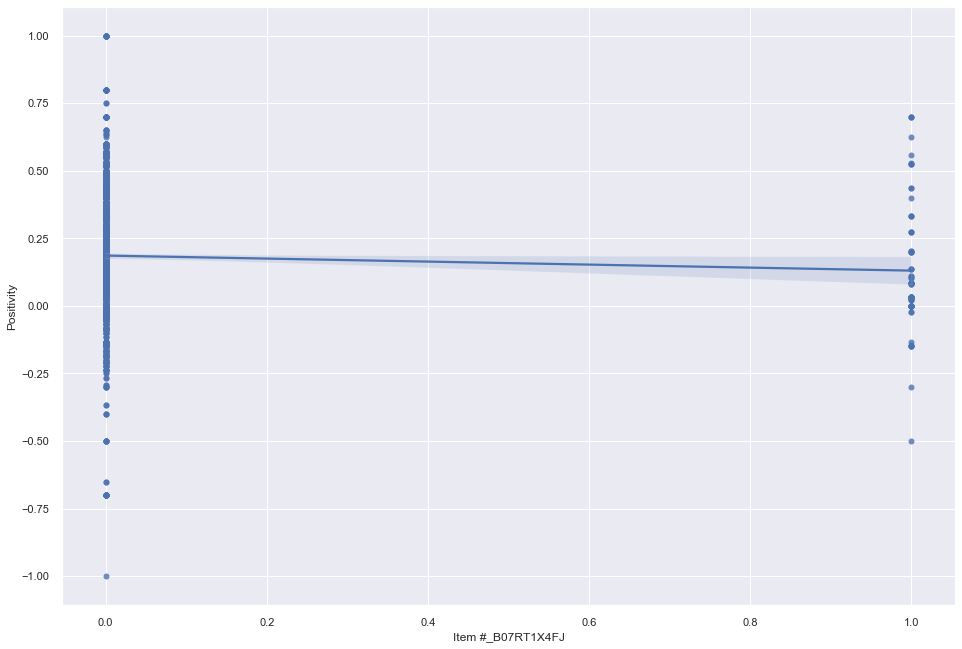

In [690]:
#Linear regression
sns.regplot(x='Item #_B07RT1X4FJ',y="Positivity",data=a_df)

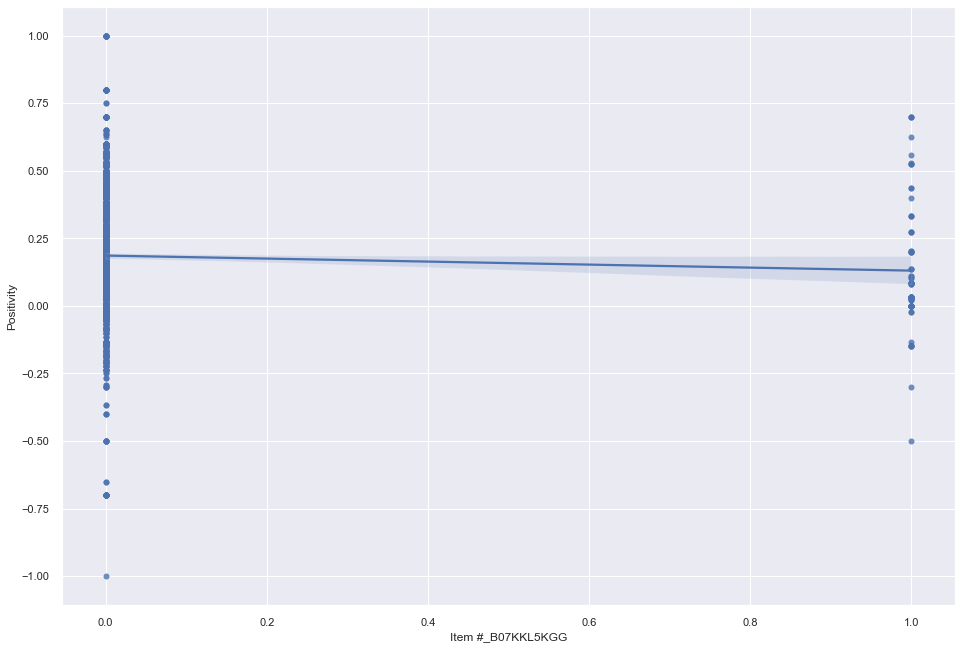

In [691]:
#Linear regression
sns.regplot(x='Item #_B07KKL5KGG',y="Positivity",data=a_df)

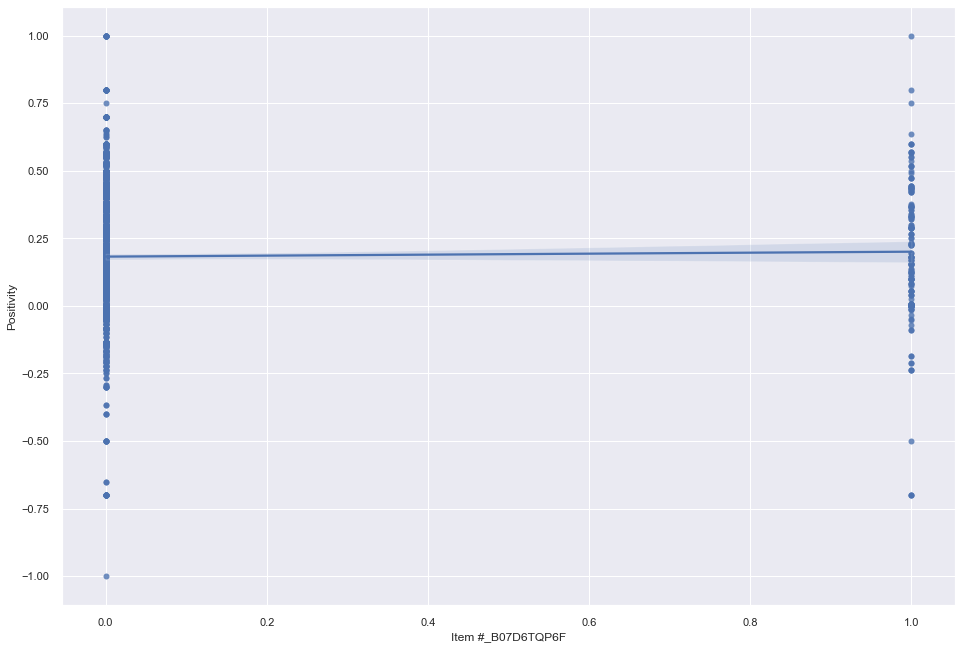

In [692]:
#Linear regression
sns.regplot(x='Item #_B07D6TQP6F',y="Positivity",data=a_df)

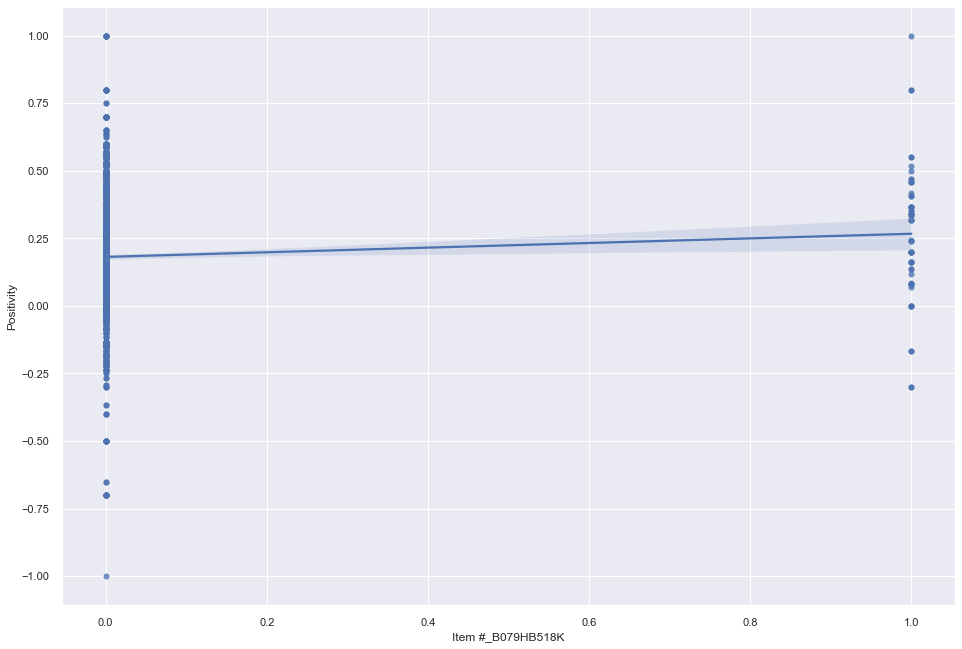

In [693]:
#Linear regression
sns.regplot(x='Item #_B079HB518K',y="Positivity",data=a_df)

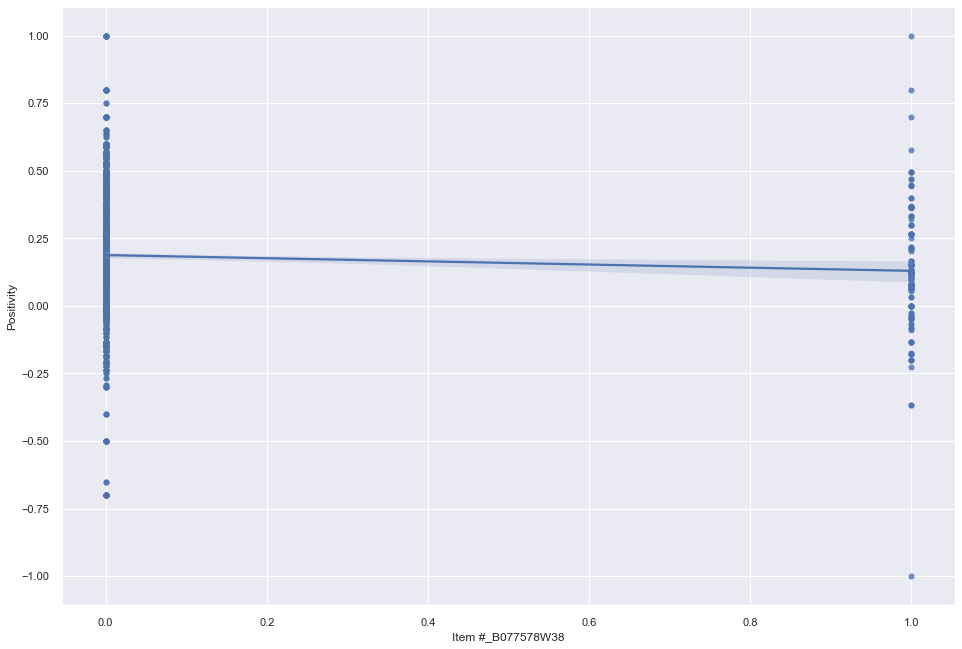

In [694]:
#Linear regression
sns.regplot(x='Item #_B077578W38',y="Positivity",data=a_df)

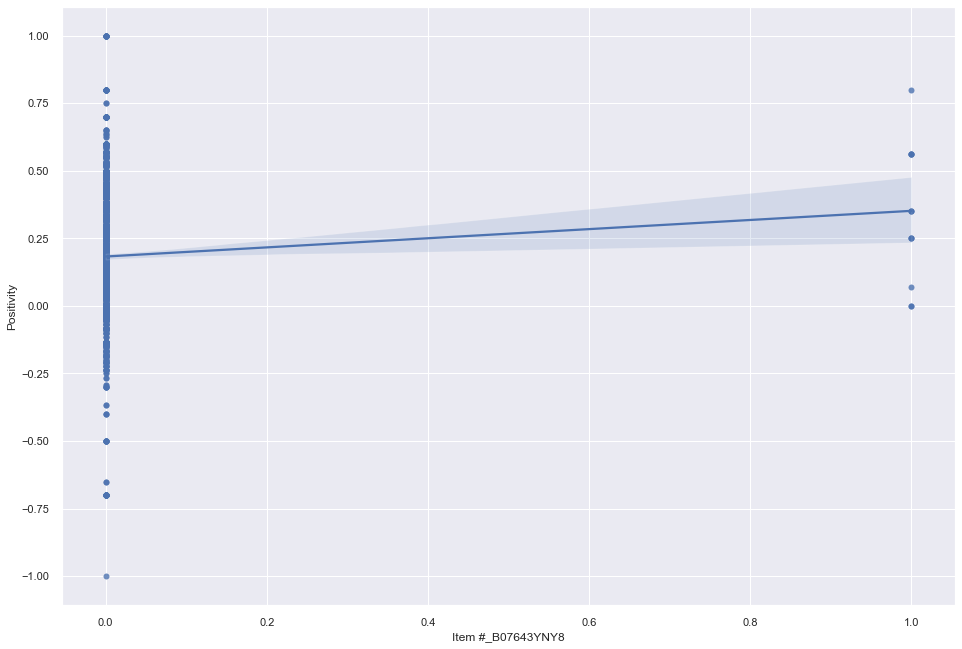

In [695]:
#Linear regression
sns.regplot(x='Item #_B07643YNY8',y="Positivity",data=a_df)

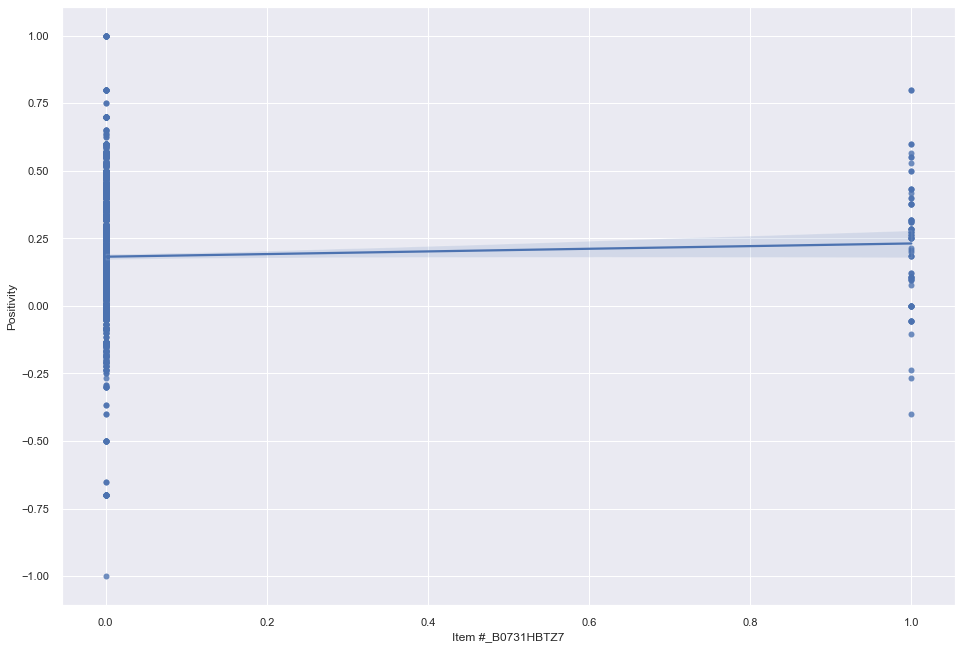

In [696]:
#Linear regression
sns.regplot(x='Item #_B0731HBTZ7',y="Positivity",data=a_df)

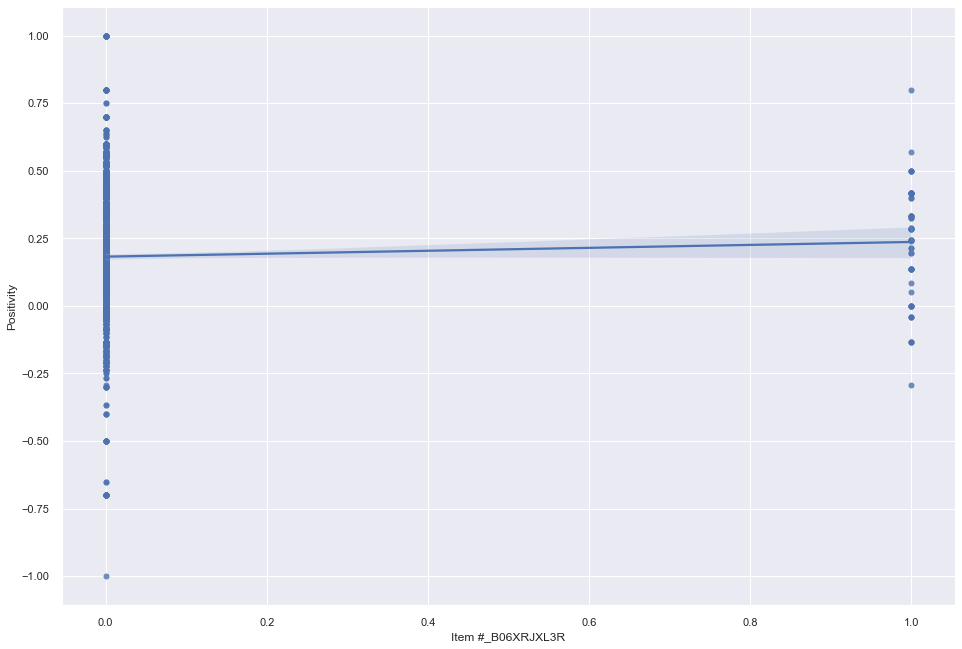

In [697]:
#Linear regression
sns.regplot(x='Item #_B06XRJXL3R',y="Positivity",data=a_df)

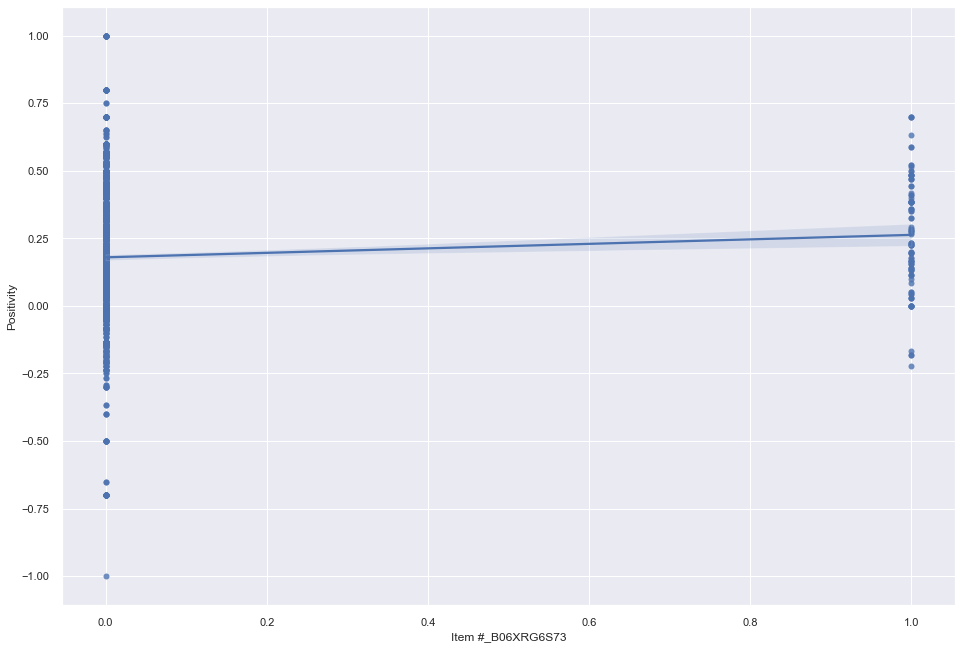

In [698]:
#Linear regression
sns.regplot(x='Item #_B06XRG6S73',y="Positivity",data=a_df)

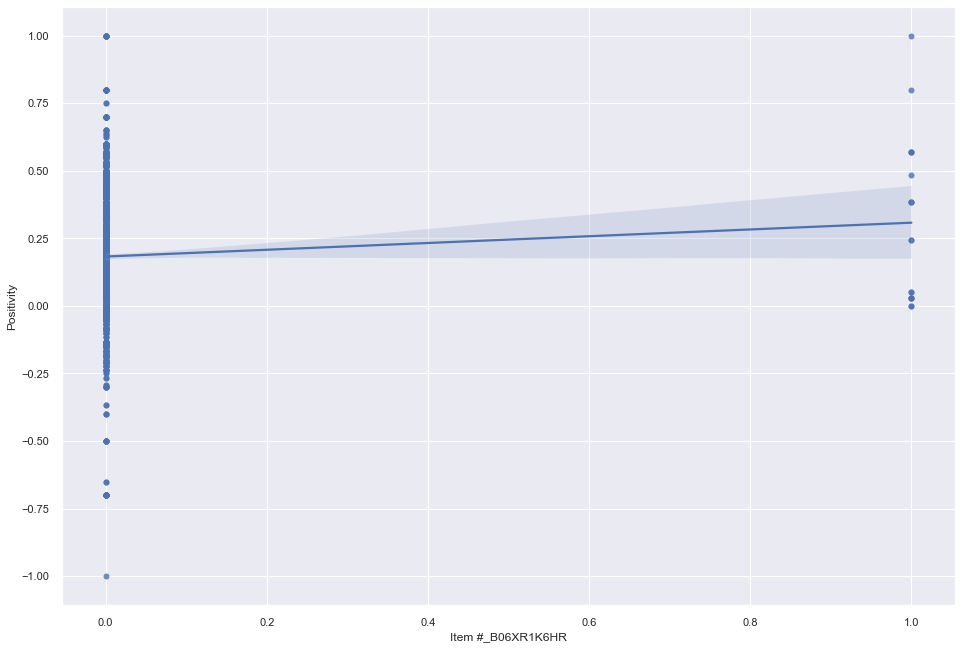

In [699]:
#Linear regression
sns.regplot(x='Item #_B06XR1K6HR',y="Positivity",data=a_df)

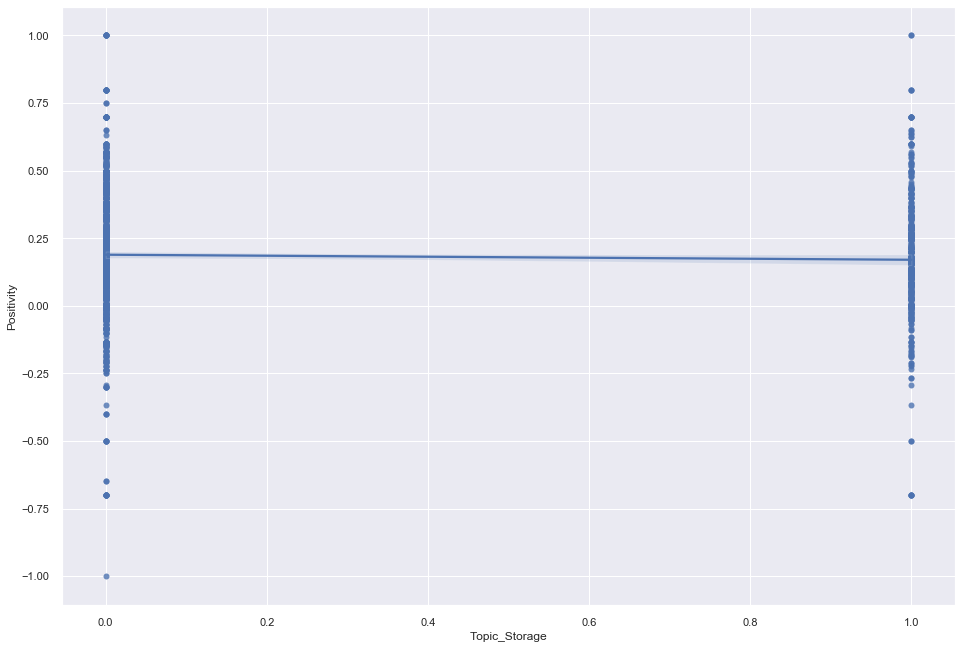

In [700]:
#Linear regression
sns.regplot(x='Topic_Storage',y="Positivity",data=a_df)

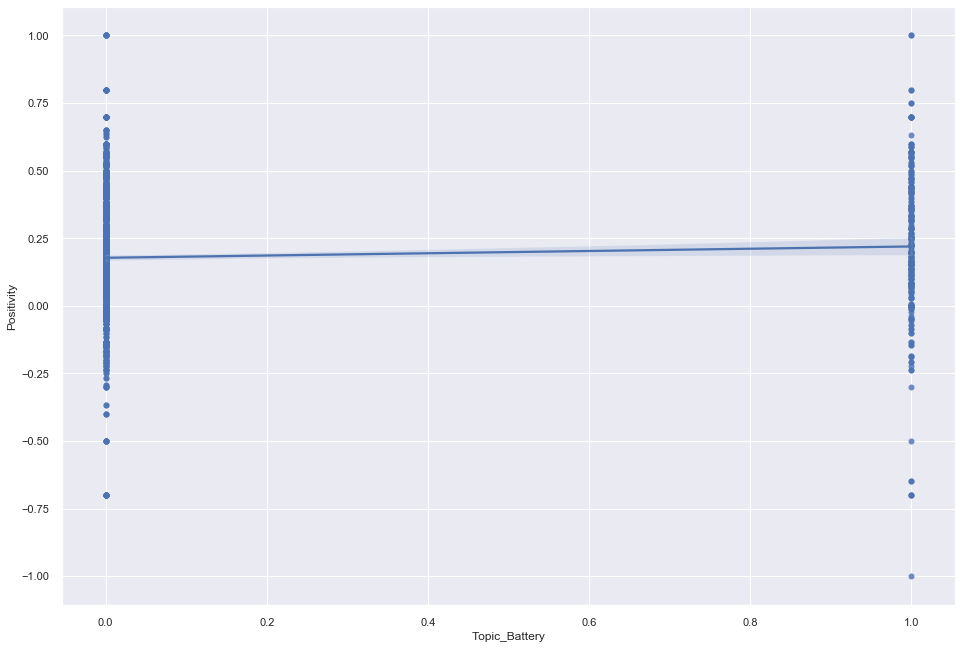

In [701]:
#Linear regression
sns.regplot(x='Topic_Battery',y="Positivity",data=a_df)

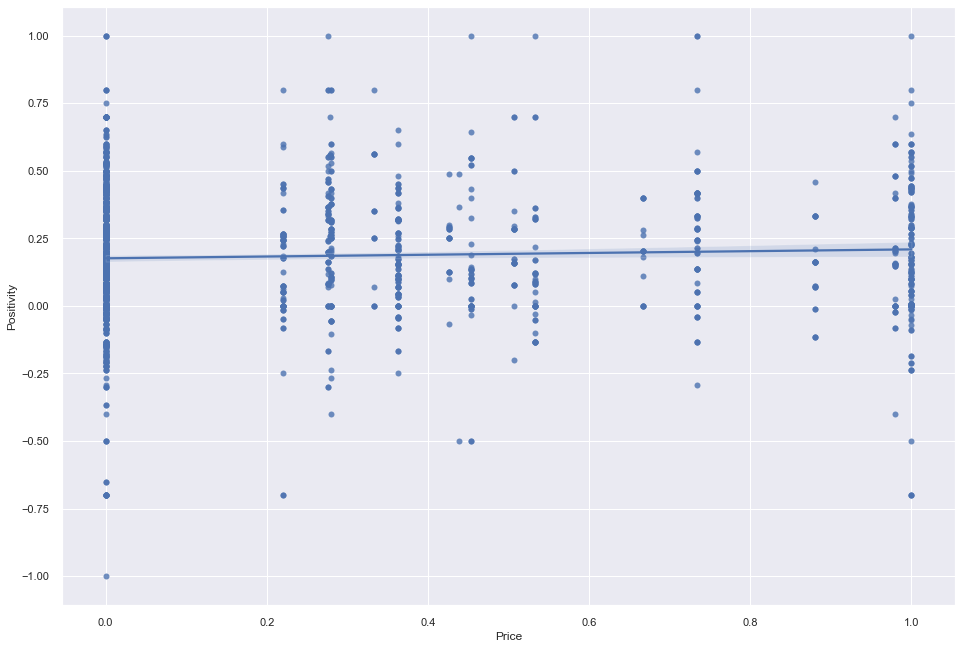

In [702]:
#Linear regression
sns.regplot(x='Price',y="Positivity",data=a_df)

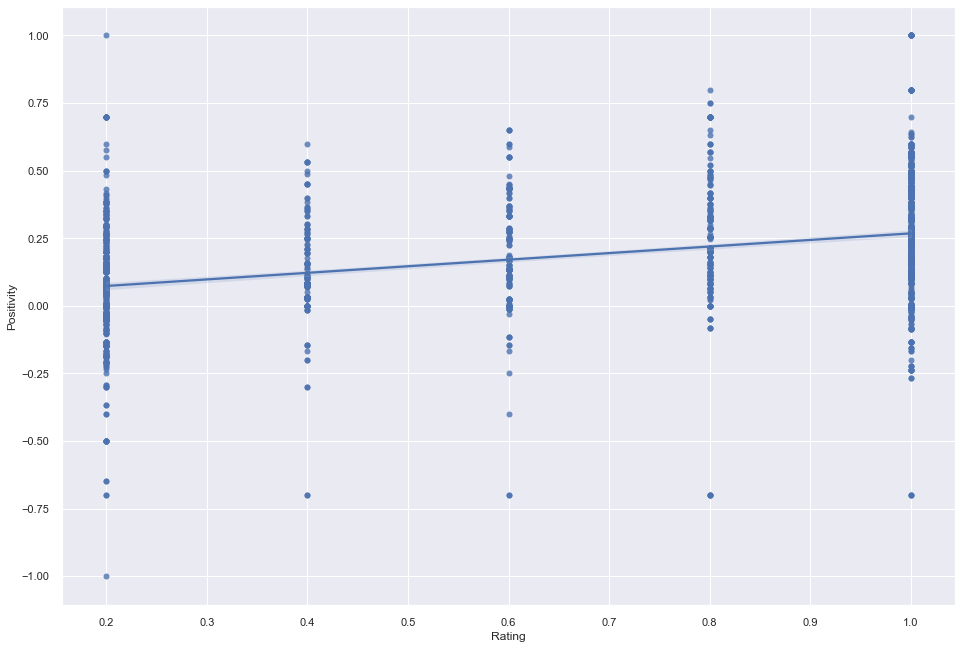

In [703]:
#Linear regression
sns.regplot(x='Rating',y="Positivity",data=a_df)

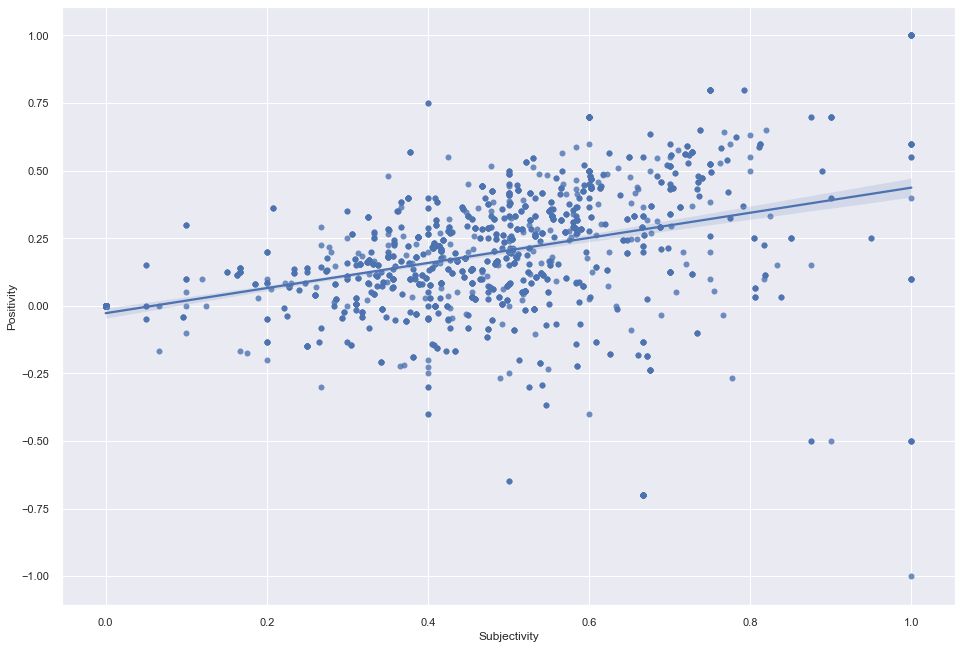

In [704]:
#Linear regression
sns.regplot(x='Subjectivity',y="Positivity",data=a_df)

In [705]:
LR = LogisticRegression(a_df_list)
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None,
                   penalty=['Topic_Battery', 'Topic_Camera', 'Topic_Music',
                            'Topic_Screen', 'Topic_Speed', 'Topic_Storage',
                            'Item #_B01CR1FQMG', 'Item #_B01GXAT0CE',
                            'Item #_B01JAWWVXW', 'Item #_B01LYHIUQ7',
                            'Item #_B01N4IHGHI', 'Item...
                            'Item #_B06X9X15Y8', 'Item #_B06XGLHP8V',
                            'Item #_B06XR1K6HR', 'Item #_B06XR8G1TX',
                            'Item #_B06XRG6S73', 'Item #_B06XRJQX91',
                            'Item #_B06XRJXL3R', 'Item #_B06XRN4RWL',
                            'Item #_B06XS3CTJM', 'Item #_B06XS4978K',
                            'Item #_B071JPQYGK', 'Item #_B071W9WQ8M',
                            'Ite

In [706]:
with open("M4-11.txt", "r"):
    print(open("M4-11.txt", "r").read())

In this section, we used the dummies feature of Pandas to convert each row to a 1 or 0 based on if it fits that category. I created a list of all of the variables from the dummies. I then cleaned the dataframe from columns no longer used.

After that, I normalized the data by dividing the price and rating by the maximum value in that column. When the information was normalized and linear regression was completed.

After linear regression was completed, I normalized the data further by dividing the coefficients by the maximum value. At that point, I created a new list of important features where feature reduction was completed to isolate the features that were outliers and focused on the item numbers that made a difference in the rating aspect.

Finally, Lasso Regression was completed to regularize the data.

It was then at this point when linear regression was recompleted with all of the features that did not have a zero value, because it isolated all meaningful differences.


# Conclusion

In [707]:
#Explanation of project and graphs.
with open("M4-12.txt", "r"):
    print(open("M4-12.txt", "r").read())

The analyses into the topic of the Amazon review of the Apple iPhones was quite telling. We found that overall, there is a modest increase over time from most topics as they increase, but an area that deserves the most amount of attention moving forward is that of the camera. However, it should be noted that within the last year of reviews, the biggest drop of review positivity scores come from both music and storage.

One fact that became very consistent throughout all analyses is that almost always, an increase of subjectivity correlated with high positivity rankings. This means that if we can excite all customers about the iPhones that it would translate to higher customer satisfaction. And the averge review had a roughly 26 people considering the review helpful.

This contrasts from the least popular aspect, the camera, which had an average helpful rating of under 23. The scores appear to be steady as of recently, although the recent subjectivity scores from the last year appear to